# Part I: Analyzing Transactions

## 1. Read in `'transactions.csv'` and generate a file with every row representing a transaction with:
- `TRUE` identifying items that were part of that transaction
- `FALSE` identifying items that were not part of that transaction

In [5]:
#Import libraries
import os
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Specify the directory to use (ensure this path is correct for your environment)
os.chdir(r'fake_path')

# Read in the dataset (adjusting the file path to ensure it's correctly specified relative to the current directory)
transactions_df_v1 = pd.read_csv(r'transactions.csv')

# Return the dimensions of the dataset (# of rows, # of columns)
print(f"\nDimension of the dataset (rows, columns): {transactions_df_v1.shape}\n")

# Display the first 5 rows of the dataset
print(transactions_df_v1.head())


Dimension of the dataset (rows, columns): (459258, 2)

   Transaction        Product
0        12359      Candy Bar
1        12362  Pain Reliever
2        12362  Pain Reliever
3        12365     Toothpaste
4        12371            Bow


Generate a file in which every row represents a transaction with boolean values

In [7]:
#Pivot the table so that each transaction is in a row and each product has its own column with `TRUE` & `FALSE` values
transactions_df_v2 = transactions_df_v1.pivot_table(

    index='Transaction', #Each unique transaction number will become a row
    columns='Product', #Each product is a column
    aggfunc=lambda x: True, #The lambda function returns `TRUE` for proeducts that appear in the transaction
    fill_value=False) #Mark as `FALSE` if the product is not part of the transaction

#Return the dimensions of data set (# of rows, # of columns)
print(f"\nDimension of the data set (rows,columns): ", transactions_df_v2.shape,"\n")

#Display the first 5 rows of the new data set
transactions_df_v2.head()


Dimension of the data set (rows,columns):  (200000, 17) 



Product,Bow,Candy Bar,Deodorant,Greeting Cards,Magazine,Markers,Pain Reliever,Pencils,Pens,Perfume,Photo Processing,Prescription Med,Shampoo,Soap,Toothbrush,Toothpaste,Wrapping Paper
Transaction,,,,,,,,,,,,,,,,,
12359,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12362,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
12365,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
12371,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12380,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#Save the file as 'group07transactions01.csv'
transactions_df_v2.to_csv('newtransactions01.csv')

## 2. Identify the frequent itemsets using a minimum support threshold of 1%. How many itemsets are frequent?

In [9]:
frq_itemsets_minsupp1percent = apriori(transactions_df_v2,
                       min_support=0.01, #Minimum support threshold of 1%
                       use_colnames=True) #Make sure the frequent itemsets use the original column names instead of index numbers

print(f"\n # of Frequent itemsets using a minimum support threshold of 1%:",len(frq_itemsets_minsupp1percent),"\n")
frq_itemsets_minsupp1percent


 # of Frequent itemsets using a minimum support threshold of 1%: 40 



,support,itemsets
0,0.054645,(Bow)
1,0.171005,(Candy Bar)
2,0.146885,(Greeting Cards)
3,0.241305,(Magazine)
4,0.026700,(Pain Reliever)
5,0.134925,(Pencils)
6,0.143575,(Pens)
7,0.089960,(Perfume)
8,0.058480,(Photo Processing)
9,0.014505,(Prescription Med)


## 3. Identify all association rules with a minimum confidence of 10%. How many rules are generated?

In [10]:
assoc_rules_conf10percent = association_rules(frq_itemsets_minsupp1percent,
                                                  metric="confidence", #Metric to use is confidence
                                                  min_threshold=0.10) #Minimum threshold of 10%

print(f"\n # of association rules using a minimum confidence of 10%:",len(assoc_rules_conf10percent),"\n")
assoc_rules_conf10percent


 # of association rules using a minimum confidence of 10%: 50 



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Toothbrush),(Bow),0.067350,0.054645,0.011340,0.168374,3.081236,0.007660,1.136755,0.724232
1,(Bow),(Toothbrush),0.054645,0.067350,0.011340,0.207521,3.081236,0.007660,1.176877,0.714499
2,(Greeting Cards),(Candy Bar),0.146885,0.171005,0.043660,0.297239,1.738191,0.018542,1.179626,0.497810
3,(Candy Bar),(Greeting Cards),0.171005,0.146885,0.043660,0.255314,1.738191,0.018542,1.145604,0.512294
4,(Magazine),(Candy Bar),0.241305,0.171005,0.040535,0.167982,0.982325,-0.000729,0.996367,-0.023167
5,(Candy Bar),(Magazine),0.171005,0.241305,0.040535,0.237040,0.982325,-0.000729,0.994410,-0.021244
6,(Pencils),(Candy Bar),0.134925,0.171005,0.033015,0.244691,1.430903,0.009942,1.097558,0.348109
7,(Candy Bar),(Pencils),0.171005,0.134925,0.033015,0.193065,1.430903,0.009942,1.072050,0.363260
8,(Toothpaste),(Candy Bar),0.160425,0.171005,0.039780,0.247966,1.450053,0.012347,1.102338,0.369675
9,(Candy Bar),(Toothpaste),0.171005,0.160425,0.039780,0.232625,1.450053,0.012347,1.094087,0.374393


## 4. Which rules have the highest lift? Using the results from the previous questions, show exactly how this lift value was calculated for one of the rules with highest lift.

$\text{Calculating lift using the rule with the highest lift ('Perfume' -> 'Toothbrush')}$

1. $
\text{Actual Confidence} = \frac{\text{Support}(\text{'Perfume'} | \text{'Toothbrush'})}{\text{Support}(\text{'Perfume'})} = \frac{0.021820}{0.089960} = 0.242552
$

2. $
\text{Benchmark Confidence} = \text{Support}(\text{'Perfume')} * {\text{Support}(\text{'Toothbrush')}} = \text{Support}(\text{'Toothbrush')} = 0.067350
$

3. $ \text{Lift} = \frac{\text{Actual Confidence}}{\text{Benchmark Confidence}} = \frac{0.242552}{0.067350} = 3.601370 $


In [11]:
#Sort the association rules by 'lift' in descending order
assoc_rules_conf10percent_sortbylift = assoc_rules_conf10percent.sort_values(['lift'], ascending = [False])

# Print the rules with the highest lift, along with antecedents and consequents
print("\nTop 5 Rules with the highest lift: (antecedent -> consequent)\n")
for i, row in assoc_rules_conf10percent_sortbylift.head(10).iterrows():
    antecedents = ', '.join(list(row['antecedents']))  # Convert frozenset to a comma-separated string
    consequents = ', '.join(list(row['consequents']))  # Convert frozenset to a comma-separated string
    print(f"{antecedents} -> {consequents}")
print()

# Print the first few rows of the sorted DataFrame
assoc_rules_conf10percent_sortbylift.head(10)


Top 5 Rules with the highest lift: (antecedent -> consequent)

Perfume -> Toothbrush
Toothbrush -> Perfume
Toothbrush -> Bow
Bow -> Toothbrush
Greeting Cards -> Magazine, Candy Bar
Magazine, Candy Bar -> Greeting Cards
Pencils, Toothpaste -> Candy Bar
Greeting Cards, Magazine -> Candy Bar
Magazine, Toothpaste -> Greeting Cards
Magazine, Toothpaste -> Candy Bar



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
27,(Perfume),(Toothbrush),0.089960,0.067350,0.021820,0.242552,3.601370,0.015761,1.231306,0.793732
26,(Toothbrush),(Perfume),0.067350,0.089960,0.021820,0.323979,3.601370,0.015761,1.346172,0.774490
0,(Toothbrush),(Bow),0.067350,0.054645,0.011340,0.168374,3.081236,0.007660,1.136755,0.724232
1,(Bow),(Toothbrush),0.054645,0.067350,0.011340,0.207521,3.081236,0.007660,1.176877,0.714499
31,(Greeting Cards),"(Magazine, Candy Bar)",0.146885,0.040535,0.016665,0.113456,2.798966,0.010711,1.082253,0.753386
30,"(Magazine, Candy Bar)",(Greeting Cards),0.040535,0.146885,0.016665,0.411126,2.798966,0.010711,1.448723,0.669879
41,"(Pencils, Toothpaste)",(Candy Bar),0.024560,0.171005,0.011390,0.463762,2.711980,0.007190,1.545947,0.647160
28,"(Greeting Cards, Magazine)",(Candy Bar),0.036335,0.171005,0.016665,0.458649,2.682078,0.010452,1.531344,0.650802
49,"(Magazine, Toothpaste)",(Greeting Cards),0.031665,0.146885,0.011945,0.377230,2.568202,0.007294,1.369873,0.630590
38,"(Magazine, Toothpaste)",(Candy Bar),0.031665,0.171005,0.013720,0.433286,2.533762,0.008305,1.462810,0.625124


## 5. For the same rule, show how leverage and conviction were obtained

leverage = sup(Toothbrush and Perfume) - sup(Toothbrush) * sup(Perfume) = 0.02182 - 0.08996 * 0.06735 = 0.015761

conviction = $\frac{1 - P(Toothbrush)}{1 - P(Toothbrush \mid Perfume)}$ = $\frac{1 - sup(Toothbrush)}{1 - conf(r)}$ = $\frac{1 - 0.06735}{1 - 0.242552}$ = 1.231306

## 6. Interpret and discuss the 5 rules with
- the highest confidence
- the highest lift
- the highest leverage
- the highest conviction

If there are more than five meeting the required criterion, pick any five. Are any of these surprising?
Comment on the extent of their redundancy and utility.

In [12]:
# Find the top 5 rules with the highest confidence
top_5rules_conf = assoc_rules_conf10percent.nlargest(5, 'confidence', keep = 'all')

# Print the rules with the highest confidence, along with antecedents, consequents, and confidence value
print("\nTop 5 Rules with the highest confidence: (antecedent -> consequent | confidence:)\n")
for i, row in top_5rules_conf.iterrows():
    antecedents = ', '.join(list(row['antecedents']))  # Convert frozenset to a comma-separated string
    consequents = ', '.join(list(row['consequents']))  # Convert frozenset to a comma-separated string
    confidence_value = row['confidence']  # Get the confidence value
    print(f"{antecedents} -> {consequents} | confidence: {confidence_value:.4f}")
print()

# Print the top 5 rows of the DataFrame
top_5rules_conf


Top 5 Rules with the highest confidence: (antecedent -> consequent | confidence:)

Pencils, Toothpaste -> Candy Bar | confidence: 0.4638
Greeting Cards, Magazine -> Candy Bar | confidence: 0.4586
Magazine, Toothpaste -> Candy Bar | confidence: 0.4333
Magazine, Candy Bar -> Greeting Cards | confidence: 0.4111
Greeting Cards, Toothpaste -> Candy Bar | confidence: 0.4107



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
41,"(Pencils, Toothpaste)",(Candy Bar),0.024560,0.171005,0.011390,0.463762,2.711980,0.007190,1.545947,0.647160
28,"(Greeting Cards, Magazine)",(Candy Bar),0.036335,0.171005,0.016665,0.458649,2.682078,0.010452,1.531344,0.650802
38,"(Magazine, Toothpaste)",(Candy Bar),0.031665,0.171005,0.013720,0.433286,2.533762,0.008305,1.462810,0.625124
30,"(Magazine, Candy Bar)",(Greeting Cards),0.040535,0.146885,0.016665,0.411126,2.798966,0.010711,1.448723,0.669879
32,"(Greeting Cards, Toothpaste)",(Candy Bar),0.032080,0.171005,0.013175,0.410692,2.401637,0.007689,1.406726,0.602960


In [13]:
# Find the top 5 rules with the highest lift
top_5rules_lift = assoc_rules_conf10percent.nlargest(5, 'lift', keep = 'all')

# Print the rules with the highest lift, along with antecedents, consequents, and lift value
print("\nTop 5 Rules with the highest lift: (antecedent -> consequent | lift:)\n")
for i, row in top_5rules_lift.iterrows():
    antecedents = ', '.join(list(row['antecedents']))  # Convert frozenset to a comma-separated string
    consequents = ', '.join(list(row['consequents']))  # Convert frozenset to a comma-separated string
    lift_value = row['lift']  # Get the lift value
    print(f"{antecedents} -> {consequents} | lift: {lift_value:.4f}")
print()

# Print the top 5 rows of the DataFrame
top_5rules_lift


Top 5 Rules with the highest lift: (antecedent -> consequent | lift:)

Perfume -> Toothbrush | lift: 3.6014
Toothbrush -> Perfume | lift: 3.6014
Toothbrush -> Bow | lift: 3.0812
Bow -> Toothbrush | lift: 3.0812
Magazine, Candy Bar -> Greeting Cards | lift: 2.7990
Greeting Cards -> Magazine, Candy Bar | lift: 2.7990



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
27,(Perfume),(Toothbrush),0.089960,0.067350,0.021820,0.242552,3.601370,0.015761,1.231306,0.793732
26,(Toothbrush),(Perfume),0.067350,0.089960,0.021820,0.323979,3.601370,0.015761,1.346172,0.774490
0,(Toothbrush),(Bow),0.067350,0.054645,0.011340,0.168374,3.081236,0.007660,1.136755,0.724232
1,(Bow),(Toothbrush),0.054645,0.067350,0.011340,0.207521,3.081236,0.007660,1.176877,0.714499
30,"(Magazine, Candy Bar)",(Greeting Cards),0.040535,0.146885,0.016665,0.411126,2.798966,0.010711,1.448723,0.669879
31,(Greeting Cards),"(Magazine, Candy Bar)",0.146885,0.040535,0.016665,0.113456,2.798966,0.010711,1.082253,0.753386


In [14]:
# Find the top 5 rules with the highest leverage
top_5rules_leverage = assoc_rules_conf10percent.nlargest(5, 'leverage', keep = 'all')

# Print the rules with the highest leverage, along with antecedents, consequents, and leverage value
print("\nTop 5 Rules with the highest leverage: (antecedent -> consequent | leverage:)\n")
for i, row in top_5rules_leverage.iterrows():
    antecedents = ', '.join(list(row['antecedents']))  # Convert frozenset to a comma-separated string
    consequents = ', '.join(list(row['consequents']))  # Convert frozenset to a comma-separated string
    leverage_value = row['leverage']  # Get the leverage value
    print(f"{antecedents} -> {consequents} | leverage: {leverage_value:.4f}")
print()

# Print the top 5 rows of the DataFrame
top_5rules_leverage


Top 5 Rules with the highest leverage: (antecedent -> consequent | leverage:)

Greeting Cards -> Candy Bar | leverage: 0.0185
Candy Bar -> Greeting Cards | leverage: 0.0185
Toothbrush -> Perfume | leverage: 0.0158
Perfume -> Toothbrush | leverage: 0.0158
Toothpaste -> Candy Bar | leverage: 0.0123
Candy Bar -> Toothpaste | leverage: 0.0123



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(Greeting Cards),(Candy Bar),0.146885,0.171005,0.04366,0.297239,1.738191,0.018542,1.179626,0.497810
3,(Candy Bar),(Greeting Cards),0.171005,0.146885,0.04366,0.255314,1.738191,0.018542,1.145604,0.512294
26,(Toothbrush),(Perfume),0.067350,0.089960,0.02182,0.323979,3.601370,0.015761,1.346172,0.774490
27,(Perfume),(Toothbrush),0.089960,0.067350,0.02182,0.242552,3.601370,0.015761,1.231306,0.793732
8,(Toothpaste),(Candy Bar),0.160425,0.171005,0.03978,0.247966,1.450053,0.012347,1.102338,0.369675
9,(Candy Bar),(Toothpaste),0.171005,0.160425,0.03978,0.232625,1.450053,0.012347,1.094087,0.374393


In [15]:
# Find the top 5 rules with the highest conviction
top_5rules_conv = assoc_rules_conf10percent.nlargest(5, 'conviction', keep = 'all')

# Print the rules with the highest conviction, along with antecedents, consequents, and conviction value
print("\nTop 5 Rules with the highest conviction: (antecedent -> consequent | conviction:)\n")
for i, row in top_5rules_conv.iterrows():
    antecedents = ', '.join(list(row['antecedents']))  # Convert frozenset to a comma-separated string
    consequents = ', '.join(list(row['consequents']))  # Convert frozenset to a comma-separated string
    conviction_value = row['conviction']  # Get the conviction value
    print(f"{antecedents} -> {consequents} | conviction: {conviction_value:.4f}")
print()

# Print the top 5 rows of the DataFrame
top_5rules_conv


Top 5 Rules with the highest conviction: (antecedent -> consequent | conviction:)

Pencils, Toothpaste -> Candy Bar | conviction: 1.5459
Greeting Cards, Magazine -> Candy Bar | conviction: 1.5313
Magazine, Toothpaste -> Candy Bar | conviction: 1.4628
Magazine, Candy Bar -> Greeting Cards | conviction: 1.4487
Greeting Cards, Toothpaste -> Candy Bar | conviction: 1.4067



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
41,"(Pencils, Toothpaste)",(Candy Bar),0.024560,0.171005,0.011390,0.463762,2.711980,0.007190,1.545947,0.647160
28,"(Greeting Cards, Magazine)",(Candy Bar),0.036335,0.171005,0.016665,0.458649,2.682078,0.010452,1.531344,0.650802
38,"(Magazine, Toothpaste)",(Candy Bar),0.031665,0.171005,0.013720,0.433286,2.533762,0.008305,1.462810,0.625124
30,"(Magazine, Candy Bar)",(Greeting Cards),0.040535,0.146885,0.016665,0.411126,2.798966,0.010711,1.448723,0.669879
32,"(Greeting Cards, Toothpaste)",(Candy Bar),0.032080,0.171005,0.013175,0.410692,2.401637,0.007689,1.406726,0.602960


# Part II: Clustering Customers
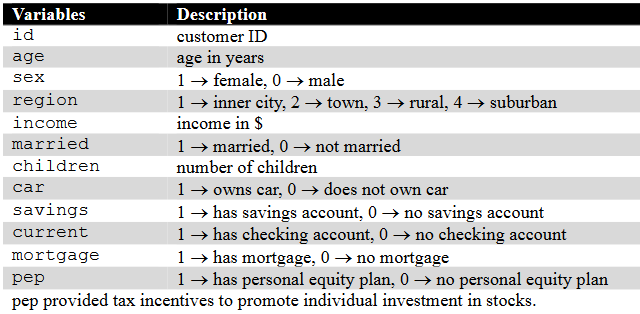

## 1. Convert `region` from Categorical to Separate (Binary) Variables
Notice that region is categorical; we need to do what is referred to as “one-hot encoding”
– convert it into separate (binary) variables, one for each possible value of region. So you will need to create 4 new variables,corresponding to inner city, town, rural, and suburban (a 1 in a column would represent being from the associated region). You can do this either explicitly by writing your own code, or by using the OneHotEncoder option available in sklearn (preprocessing).

### Read in the `bankcustomers.csv` dataset, create the four new columns, and drop region.

In [16]:
#Import libraries
import scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans as km
from scipy.cluster.hierarchy import fcluster

In [19]:
#Import the dataset
bankcustomers_df_v1 = pd.read_csv(r'hw02_group07\bankcustomers.csv')

#Return the dimensions of data set (# of rows, # of columns)
print(f"\nDimension of the data set (rows,columns): ", bankcustomers_df_v1.shape,"\n")

#Display the first 5 rows of the data set
bankcustomers_df_v1.head()


Dimension of the data set (rows,columns):  (600, 13) 



,Unnamed: 0,id,age,sex,region,income,married,children,car,savings,checking,mortgage,pep
0,0,ID12101,48,1,1,17546.0,0,1,0,0,0,0,1
1,1,ID12102,40,0,2,30085.1,1,3,1,0,1,1,0
2,2,ID12103,51,1,1,16575.4,1,0,1,1,1,0,0
3,3,ID12104,23,1,2,20375.4,1,3,0,0,1,0,0
4,4,ID12105,57,1,3,50576.3,1,0,0,1,0,0,0


In [68]:
#Count the number of missing values in each column
bankcustomers_df_v1.isna().sum()

,0
Unnamed: 0,0
id,0
age,0
sex,0
region,0
income,0
married,0
children,0
car,0
savings,0


In [20]:
# Initialize the OneHotEncoder object
onehotencoder = OneHotEncoder(sparse_output=False)

# Fit and transform the 'region' data
bankcustomers_encoded_regions = onehotencoder.fit_transform(bankcustomers_df_v1[['region']])

# Get the region names from the OneHotEncoder and map them to the custom labels
region_names = ['inner city', 'town', 'rural', 'suburban']  # Manually specified region names
bankcustomers_encoded_regions_df = pd.DataFrame(bankcustomers_encoded_regions, columns=region_names)

# Concatenate the original bankcustomers DataFrame with the encoded region data
bankcustomers_df_v2 = pd.concat([bankcustomers_df_v1, bankcustomers_encoded_regions_df], axis=1)

# Drop the original 'region' column
bankcustomers_df_v2.drop(columns=['region'], inplace=True)

#Drop 'Unamed' and 'id' column
bankcustomers_df_v2 = bankcustomers_df_v2.drop(['Unnamed: 0','id'], axis = 1)

#Print Explanation of Regions
print("Region Values= 1 = Inner city, 2 = Town, 3 = Rural, and 4 = Suburban\n")

# Display the first 5 rows of the updated DataFrame
bankcustomers_df_v2.head()

Region Values= 1 = Inner city, 2 = Town, 3 = Rural, and 4 = Suburban



,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner city,town,rural,suburban
0,48,1,17546.0,0,1,0,0,0,0,1,1.0,0.0,0.0,0.0
1,40,0,30085.1,1,3,1,0,1,1,0,0.0,1.0,0.0,0.0
2,51,1,16575.4,1,0,1,1,1,0,0,1.0,0.0,0.0,0.0
3,23,1,20375.4,1,3,0,0,1,0,0,0.0,1.0,0.0,0.0
4,57,1,50576.3,1,0,0,1,0,0,0,0.0,0.0,1.0,0.0


## 2. Applying Hierarchial Clustering with Euclidian Distance
Apply hierarchical clustering (with Euclidian distance as the measure of distance) to the dataset using:
- (i) centroidlinkage
- (ii) single linkage
- (iii) complete linkage
- (iv) average linkage
- (v) Ward linkage

In [70]:
#Normalize the data and place in a DataFrame
bankcustomers_df_v3 = pd.DataFrame(normalize(bankcustomers_df_v2), columns=bankcustomers_df_v2.columns)

bankcustomers_df_v3.head()

,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner city,town,rural,suburban
0,0.002736,0.000057,0.999996,0.000000,0.000057,0.000000,0.00000,0.000000,0.000000,0.000057,0.000057,0.000000,0.00000,0.0
1,0.001330,0.000000,0.999999,0.000033,0.000100,0.000033,0.00000,0.000033,0.000033,0.000000,0.000000,0.000033,0.00000,0.0
2,0.003077,0.000060,0.999995,0.000060,0.000000,0.000060,0.00006,0.000060,0.000000,0.000000,0.000060,0.000000,0.00000,0.0
3,0.001129,0.000049,0.999999,0.000049,0.000147,0.000000,0.00000,0.000049,0.000000,0.000000,0.000000,0.000049,0.00000,0.0
4,0.001127,0.000020,0.999999,0.000020,0.000000,0.000000,0.00002,0.000000,0.000000,0.000000,0.000000,0.000000,0.00002,0.0


### Hierarchical Clustering: Centroid Linkage

In [71]:
hc_centroid_linkage = hc.linkage(bankcustomers_df_v3, method='centroid', metric="euclidean")
hc_centroid_linkage[0]

array([1.15000000e+02, 1.27000000e+02, 6.50256463e-06, 2.00000000e+00])

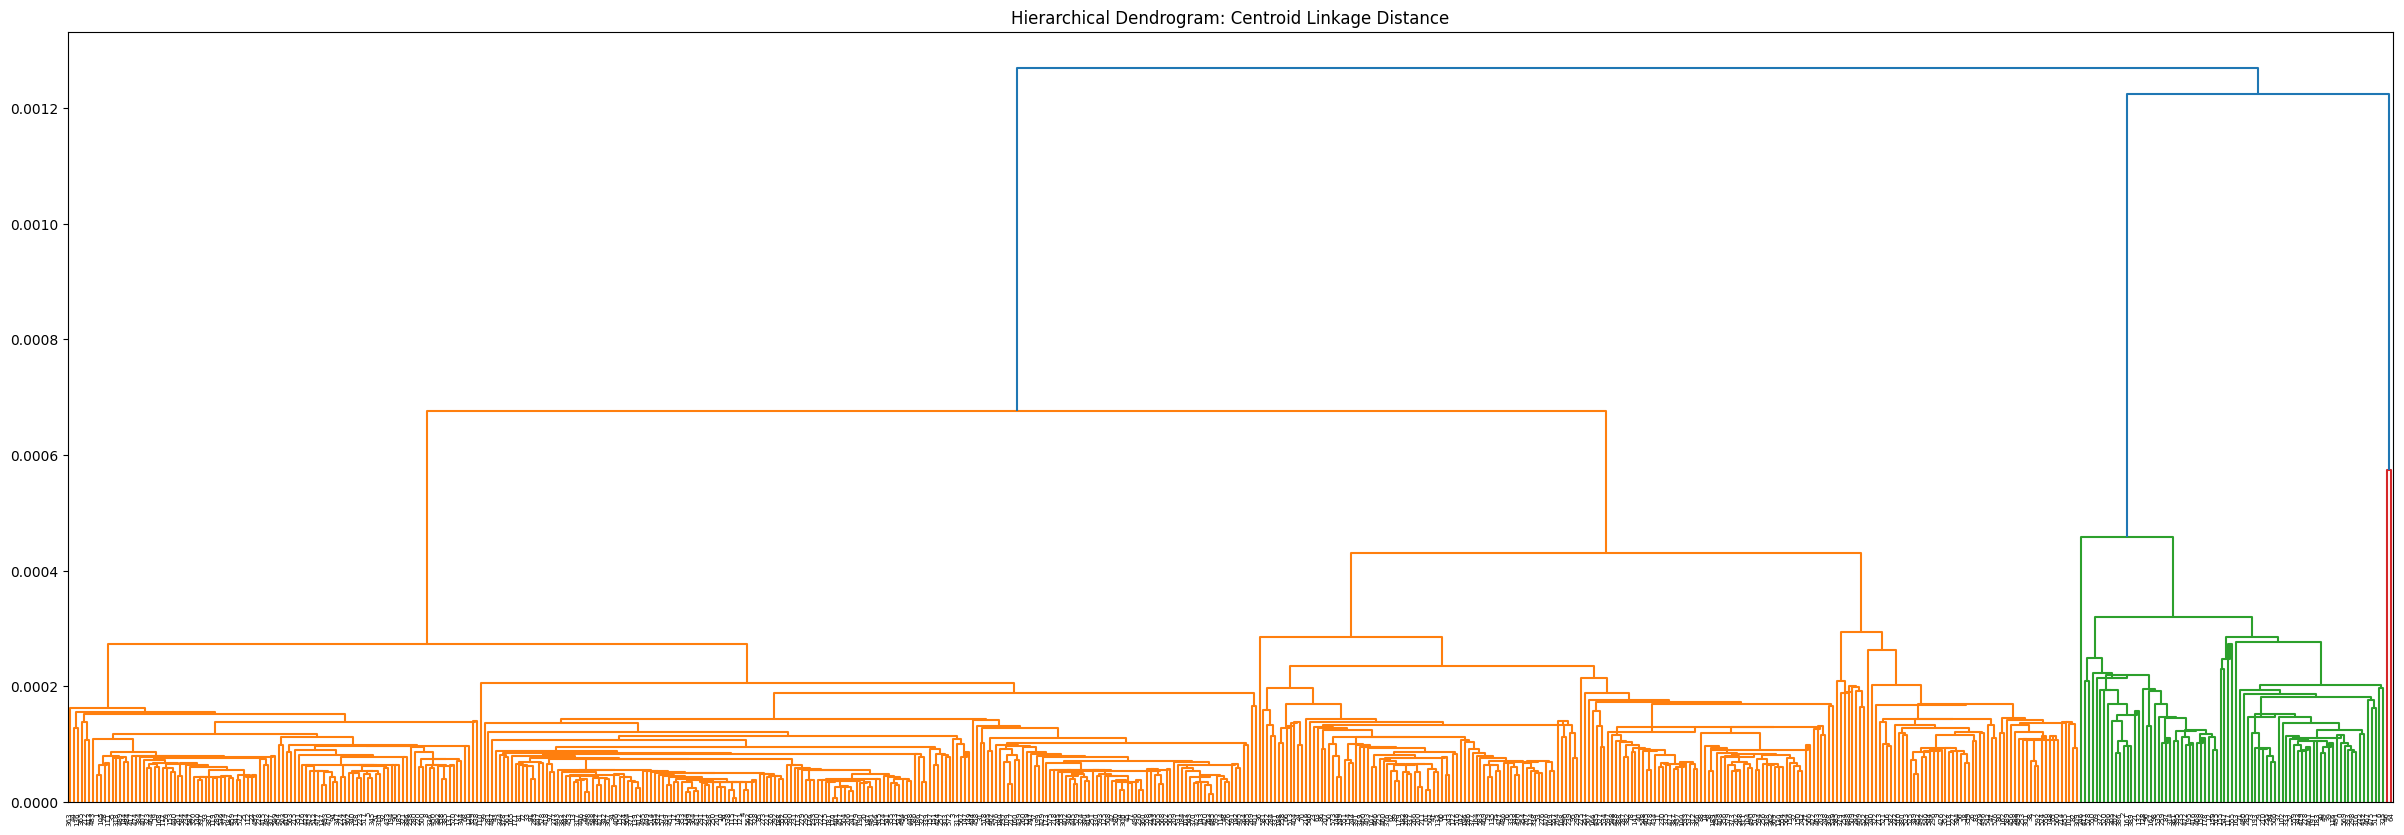


Maximum distance between merged clusters using Centroid linkage = 0.001268 (rounded to the 6th decimal)

Default threshold for cluster formation using Centroid linkage = 0.000888 (rounded to the 6th decimal)


In [72]:
#Draw dendogram
plt.figure(figsize=(30,10))
plt.title("Hierarchical Dendrogram: Centroid Linkage Distance")
dg_centroid = hc.dendrogram(hc_centroid_linkage)
plt.show()

maxdist_centroid = max(hc_centroid_linkage[:,2])

print(f"\nMaximum distance between merged clusters using Centroid linkage = {maxdist_centroid:.6f} (rounded to the 6th decimal)")
print(f"\nDefault threshold for cluster formation using Centroid linkage = {0.7*maxdist_centroid:.6f} (rounded to the 6th decimal)")

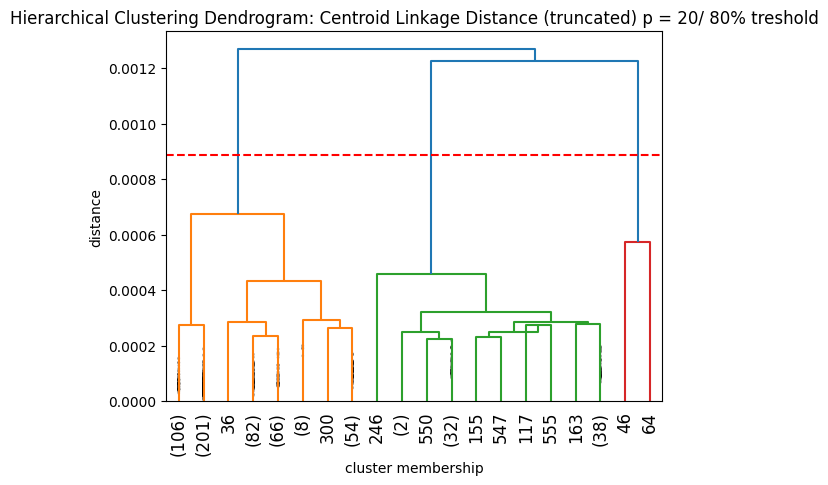

In [73]:
#Display truncated dendogram with a horizontal line to separate with p = 20/ 80% treshold
plt.title('Hierarchical Clustering Dendrogram: Centroid Linkage Distance (truncated) p = 20/ 80% treshold')
plt.xlabel('cluster membership')
plt.ylabel('distance')
hc.dendrogram(hc_centroid_linkage, truncate_mode='lastp', p=20, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.axhline(y=0.7*max(hc_centroid_linkage[:,2]), color='r', linestyle='--')
plt.show()

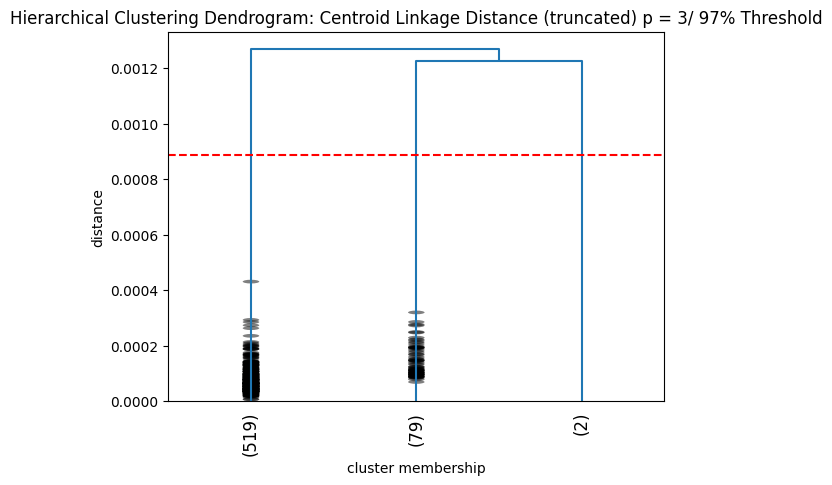

In [74]:
#Display truncated dendogram with a horizontal line to separate with p = 3
plt.title('Hierarchical Clustering Dendrogram: Centroid Linkage Distance (truncated) p = 3/ 97% Threshold')
plt.xlabel('cluster membership')
plt.ylabel('distance')
hc.dendrogram(hc_centroid_linkage, truncate_mode='lastp', p=3, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.axhline(y=0.7*max(hc_centroid_linkage[:,2]), color='r', linestyle='--')
plt.show()

In [75]:
#Identify Cluster Membership
clusters_centroid = fcluster(hc_centroid_linkage,0.7* maxdist_centroid, criterion='distance')
clusters_centroid

array([2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,

In [76]:
#Add the cluster id to the normalized dataset
bankcustomers_df_v3_centroid = bankcustomers_df_v3.copy()
bankcustomers_df_v3_centroid['cluster'] = clusters_centroid
bankcustomers_df_v3_centroid.groupby('cluster', as_index=False).mean()

,cluster,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner city,town,rural,suburban
0,1,0.001532,0.000020,0.999999,0.000028,0.000042,0.000020,0.000028,0.000032,0.000015,0.000017,0.000019,0.000012,0.000007,0.000004
1,2,0.002770,0.000038,0.999996,0.000044,0.000072,0.000027,0.000038,0.000052,0.000023,0.000026,0.000038,0.000019,0.000008,0.000008
2,3,0.003976,0.000038,0.999992,0.000000,0.000038,0.000137,0.000137,0.000137,0.000100,0.000038,0.000038,0.000100,0.000000,0.000000


In [77]:
bankcustomers_df_v2['cluster'] = clusters_centroid
print(bankcustomers_df_v2.head())
dfAvg = bankcustomers_df_v2.groupby('cluster', as_index=False).mean()
dfAvg

   age  sex   income  married  children  car  savings  checking  mortgage  \
0   48    1  17546.0        0         1    0        0         0         0   
1   40    0  30085.1        1         3    1        0         1         1   
2   51    1  16575.4        1         0    1        1         1         0   
3   23    1  20375.4        1         3    0        0         1         0   
4   57    1  50576.3        1         0    0        1         0         0   

   pep  inner city  town  rural  suburban  cluster  
0    1         1.0   0.0    0.0       0.0        2  
1    0         0.0   1.0    0.0       0.0        1  
2    0         1.0   0.0    0.0       0.0        2  
3    0         0.0   1.0    0.0       0.0        1  
4    0         0.0   0.0    1.0       0.0        1  


,cluster,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner city,town,rural,suburban
0,1,42.277457,0.493256,29388.944297,0.66474,1.015414,0.508671,0.709056,0.766859,0.348748,0.470135,0.439306,0.290944,0.167630,0.102119
1,2,43.341772,0.544304,15737.449747,0.64557,1.000000,0.379747,0.556962,0.696203,0.341772,0.367089,0.506329,0.265823,0.113924,0.113924
2,3,35.500000,0.500000,9149.055000,0.00000,0.500000,1.000000,1.000000,1.000000,0.500000,0.500000,0.500000,0.500000,0.000000,0.000000


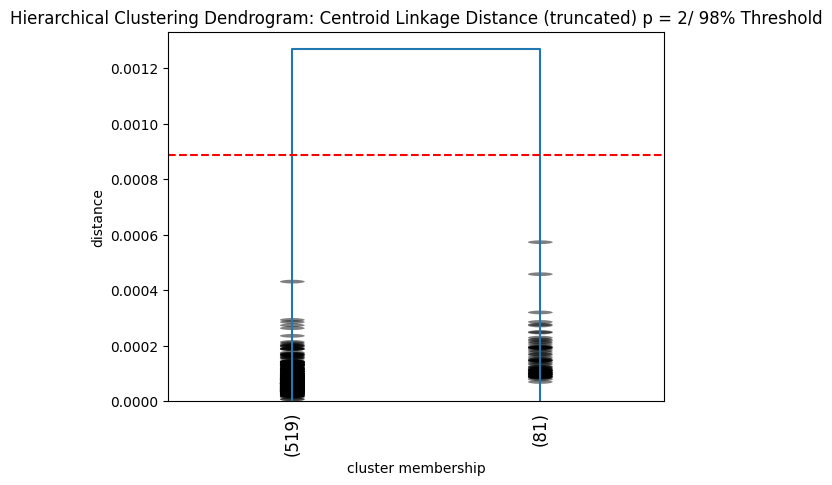

In [78]:
#Recommended solution using 2 clusters

#Display truncated dendogram with a horizontal line to separate with p = 2
plt.title('Hierarchical Clustering Dendrogram: Centroid Linkage Distance (truncated) p = 2/ 98% Threshold')
plt.xlabel('cluster membership')
plt.ylabel('distance')
hc.dendrogram(hc_centroid_linkage, truncate_mode='lastp', p=2, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.axhline(y=0.7*max(hc_centroid_linkage[:,2]), color='r', linestyle='--')
plt.show()

### Hierarchical Clustering: Single (nearest) linkage

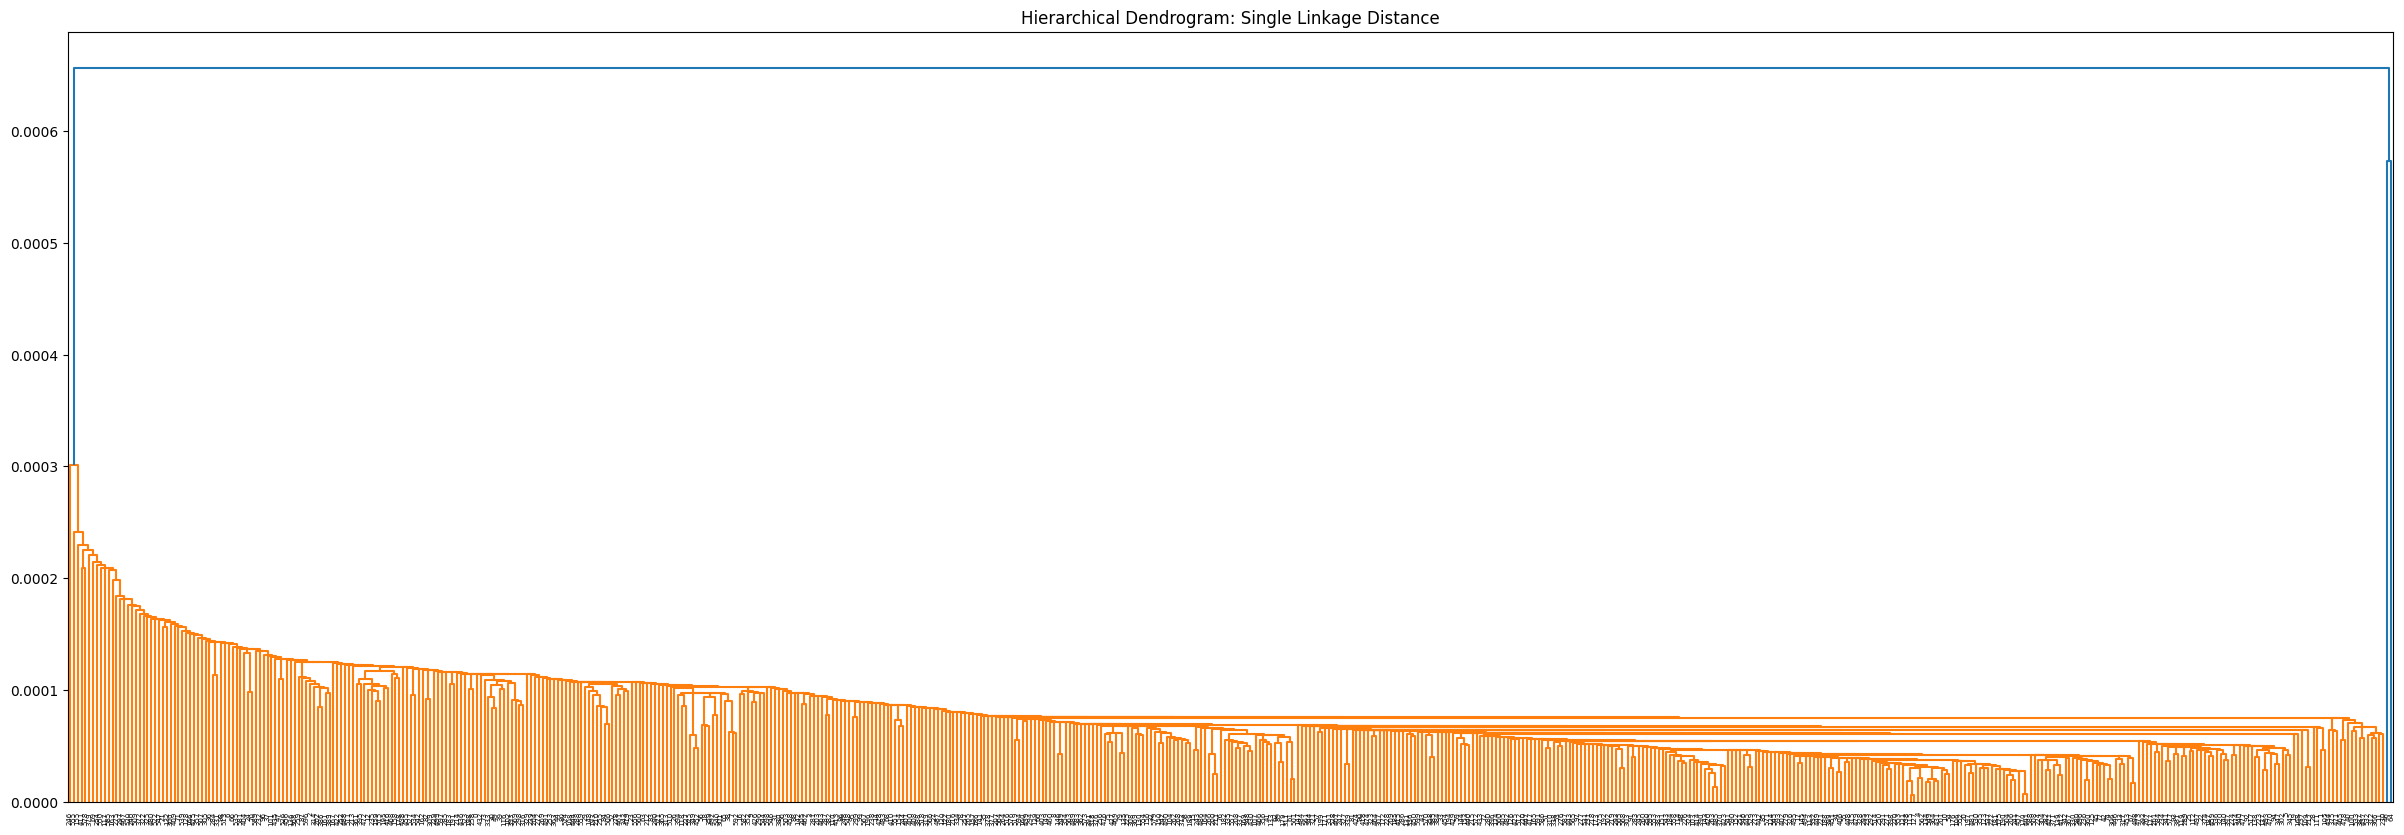


Maximum distance between merged clusters using Single linkage = 0.000656 (rounded to the 6th decimal)

Default threshold for cluster formation using Single linkage = 0.000459 (rounded to the 6th decimal)


In [79]:
#Draw the dentrogram
hc_single_linkage = hc.linkage(bankcustomers_df_v3, method='single', metric="euclidean")
plt.figure(figsize=(30, 10))
plt.title("Hierarchical Dendrogram: Single Linkage Distance")
dg_single = hc.dendrogram(hc_single_linkage)
plt.show()

maxdist_single = max(hc_single_linkage[:,2])

print(f"\nMaximum distance between merged clusters using Single linkage = {maxdist_single:.6f} (rounded to the 6th decimal)")
print(f"\nDefault threshold for cluster formation using Single linkage = {0.7*maxdist_single:.6f} (rounded to the 6th decimal)")

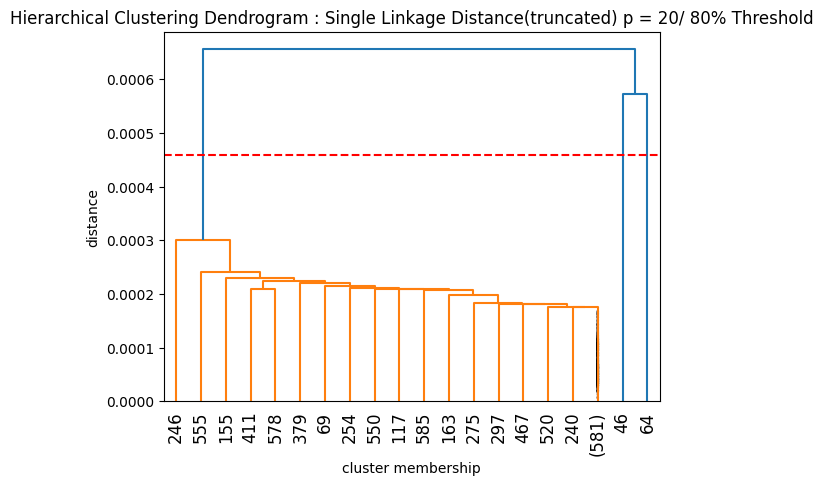

In [80]:
#Display truncated dendogram with a horizontal line to separate with p = 20
plt.title('Hierarchical Clustering Dendrogram : Single Linkage Distance(truncated) p = 20/ 80% Threshold')
plt.xlabel('cluster membership')
plt.ylabel('distance')
hc.dendrogram(hc_single_linkage, truncate_mode='lastp', p=20, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.axhline(y=0.7*max(hc_single_linkage[:,2]), color='r', linestyle='--')
plt.show()

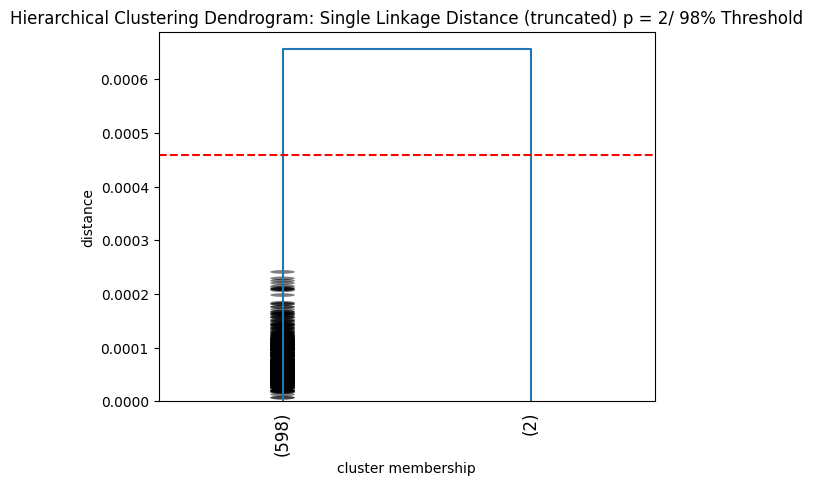

In [81]:
#Display truncated dendogram with a horizontal line to separate with p = 2
plt.title('Hierarchical Clustering Dendrogram: Single Linkage Distance (truncated) p = 2/ 98% Threshold')
plt.xlabel('cluster membership')
plt.ylabel('distance')
hc.dendrogram(hc_single_linkage, truncate_mode='lastp', p=2, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.axhline(y=0.7*max(hc_single_linkage[:,2]), color='r', linestyle='--')
plt.show()

In [82]:
#Identify Cluster Membership
clusters_single = fcluster(hc_single_linkage,0.7* maxdist_single, criterion='distance')
clusters_single

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [83]:
bankcustomers_df_v2['cluster'] = clusters_single
print(bankcustomers_df_v2.head())
dfAvg = bankcustomers_df_v2.groupby('cluster', as_index=False).mean()
dfAvg

   age  sex   income  married  children  car  savings  checking  mortgage  \
0   48    1  17546.0        0         1    0        0         0         0   
1   40    0  30085.1        1         3    1        0         1         1   
2   51    1  16575.4        1         0    1        1         1         0   
3   23    1  20375.4        1         3    0        0         1         0   
4   57    1  50576.3        1         0    0        1         0         0   

   pep  inner city  town  rural  suburban  cluster  
0    1         1.0   0.0    0.0       0.0        1  
1    0         0.0   1.0    0.0       0.0        1  
2    0         1.0   0.0    0.0       0.0        1  
3    0         0.0   1.0    0.0       0.0        1  
4    0         0.0   0.0    1.0       0.0        1  


,cluster,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner city,town,rural,suburban
0,1,42.41806,0.5,27585.485987,0.662207,1.013378,0.491639,0.688963,0.757525,0.347826,0.456522,0.448161,0.287625,0.160535,0.103679
1,2,50.00000,1.0,13283.900000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
2,3,21.00000,0.0,5014.210000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000


### Hierarchical Clustering: Complete linkage

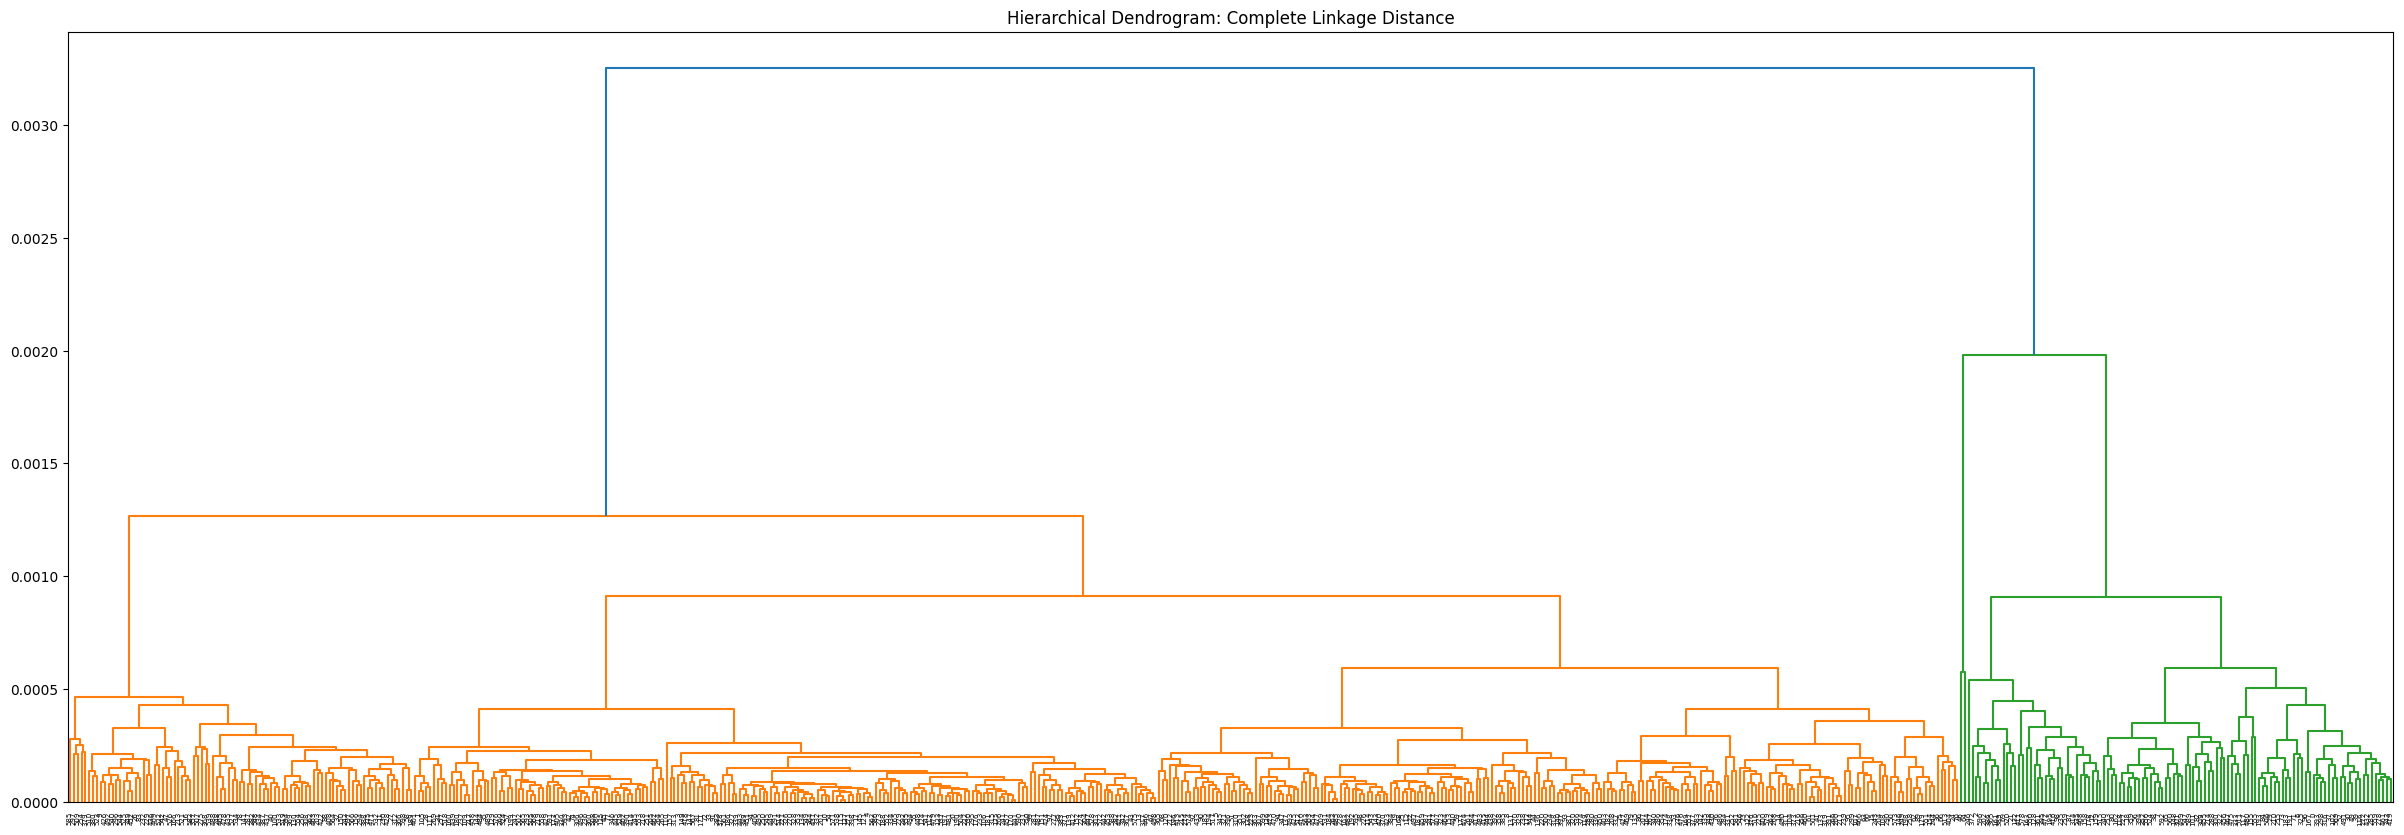


Maximum distance between merged clusters using Complete linkage = 0.003250 (rounded to the 6th decimal)

Default threshold for cluster formation using Complete linkage = 0.002275 (rounded to the 6th decimal)


In [84]:
#Draw the dentrogram
hc_complete_linkage = hc.linkage(bankcustomers_df_v3, method='complete', metric="euclidean")
plt.figure(figsize=(30, 10))
plt.title("Hierarchical Dendrogram: Complete Linkage Distance")
dg_complete = hc.dendrogram(hc_complete_linkage)
plt.show()

maxdist_complete = max(hc_complete_linkage[:,2])

print(f"\nMaximum distance between merged clusters using Complete linkage = {maxdist_complete:.6f} (rounded to the 6th decimal)")
print(f"\nDefault threshold for cluster formation using Complete linkage = {0.7*maxdist_complete:.6f} (rounded to the 6th decimal)")

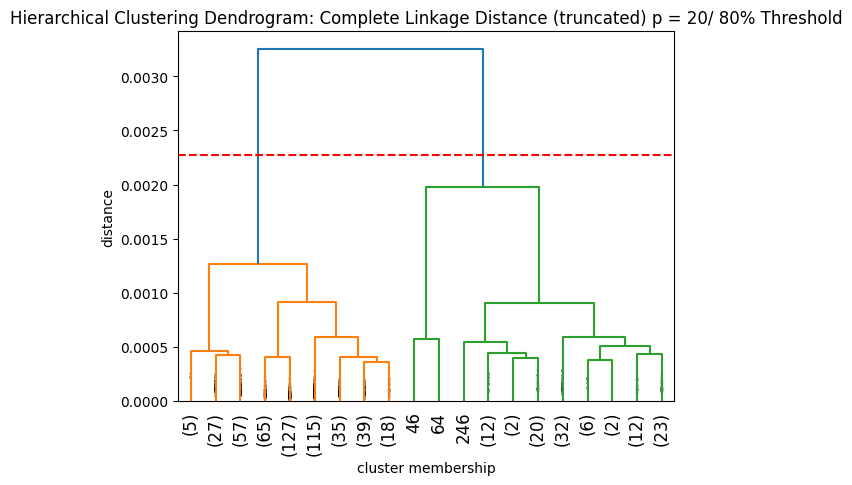

In [85]:
#Display truncated dendogram with a horizontal line to separate with p = 20
plt.title('Hierarchical Clustering Dendrogram: Complete Linkage Distance (truncated) p = 20/ 80% Threshold')
plt.xlabel('cluster membership')
plt.ylabel('distance')
hc.dendrogram(hc_complete_linkage, truncate_mode='lastp', p=20, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.axhline(y=0.7*max(hc_complete_linkage[:,2]), color='r', linestyle='--')
plt.show()

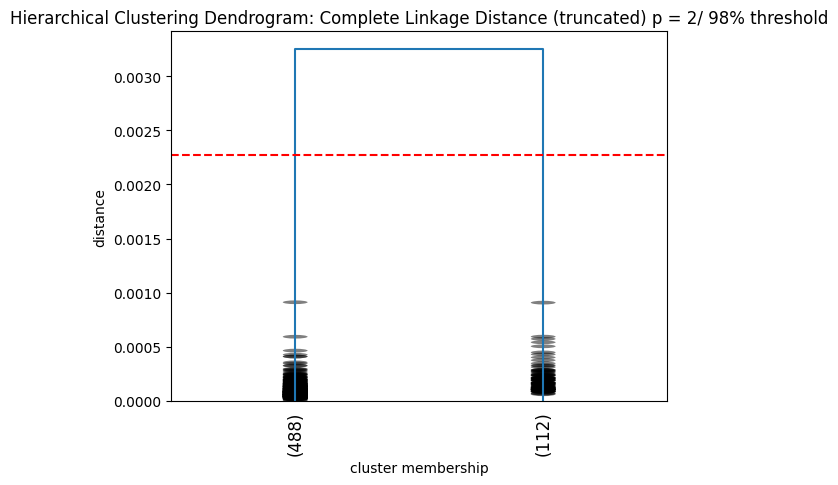

In [86]:
#Display truncated dendogram with a horizontal line to separate with p = 2
plt.title('Hierarchical Clustering Dendrogram: Complete Linkage Distance (truncated) p = 2/ 98% threshold')
plt.xlabel('cluster membership')
plt.ylabel('distance')
hc.dendrogram(hc_complete_linkage, truncate_mode='lastp', p=2, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.axhline(y=0.7*max(hc_complete_linkage[:,2]), color='r', linestyle='--')
plt.show()

In [87]:
#Identify Cluster Membership
clusters_complete = fcluster(hc_complete_linkage,0.7* maxdist_complete, criterion='distance')
clusters_complete

array([2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,

In [88]:
bankcustomers_df_v2['cluster'] = clusters_complete
print(bankcustomers_df_v2.head())
dfAvg = bankcustomers_df_v2.groupby('cluster', as_index=False).mean()
dfAvg

   age  sex   income  married  children  car  savings  checking  mortgage  \
0   48    1  17546.0        0         1    0        0         0         0   
1   40    0  30085.1        1         3    1        0         1         1   
2   51    1  16575.4        1         0    1        1         1         0   
3   23    1  20375.4        1         3    0        0         1         0   
4   57    1  50576.3        1         0    0        1         0         0   

   pep  inner city  town  rural  suburban  cluster  
0    1         1.0   0.0    0.0       0.0        2  
1    0         0.0   1.0    0.0       0.0        1  
2    0         1.0   0.0    0.0       0.0        2  
3    0         0.0   1.0    0.0       0.0        1  
4    0         0.0   0.0    1.0       0.0        1  


,cluster,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner city,town,rural,suburban
0,1,42.331967,0.483607,30127.437705,0.661885,1.036885,0.508197,0.704918,0.772541,0.356557,0.47541,0.442623,0.284836,0.170082,0.102459
1,2,42.669643,0.571429,16180.617232,0.651786,0.901786,0.428571,0.625000,0.696429,0.312500,0.37500,0.473214,0.303571,0.116071,0.107143


### Hierarchical Clustering:Average linkage

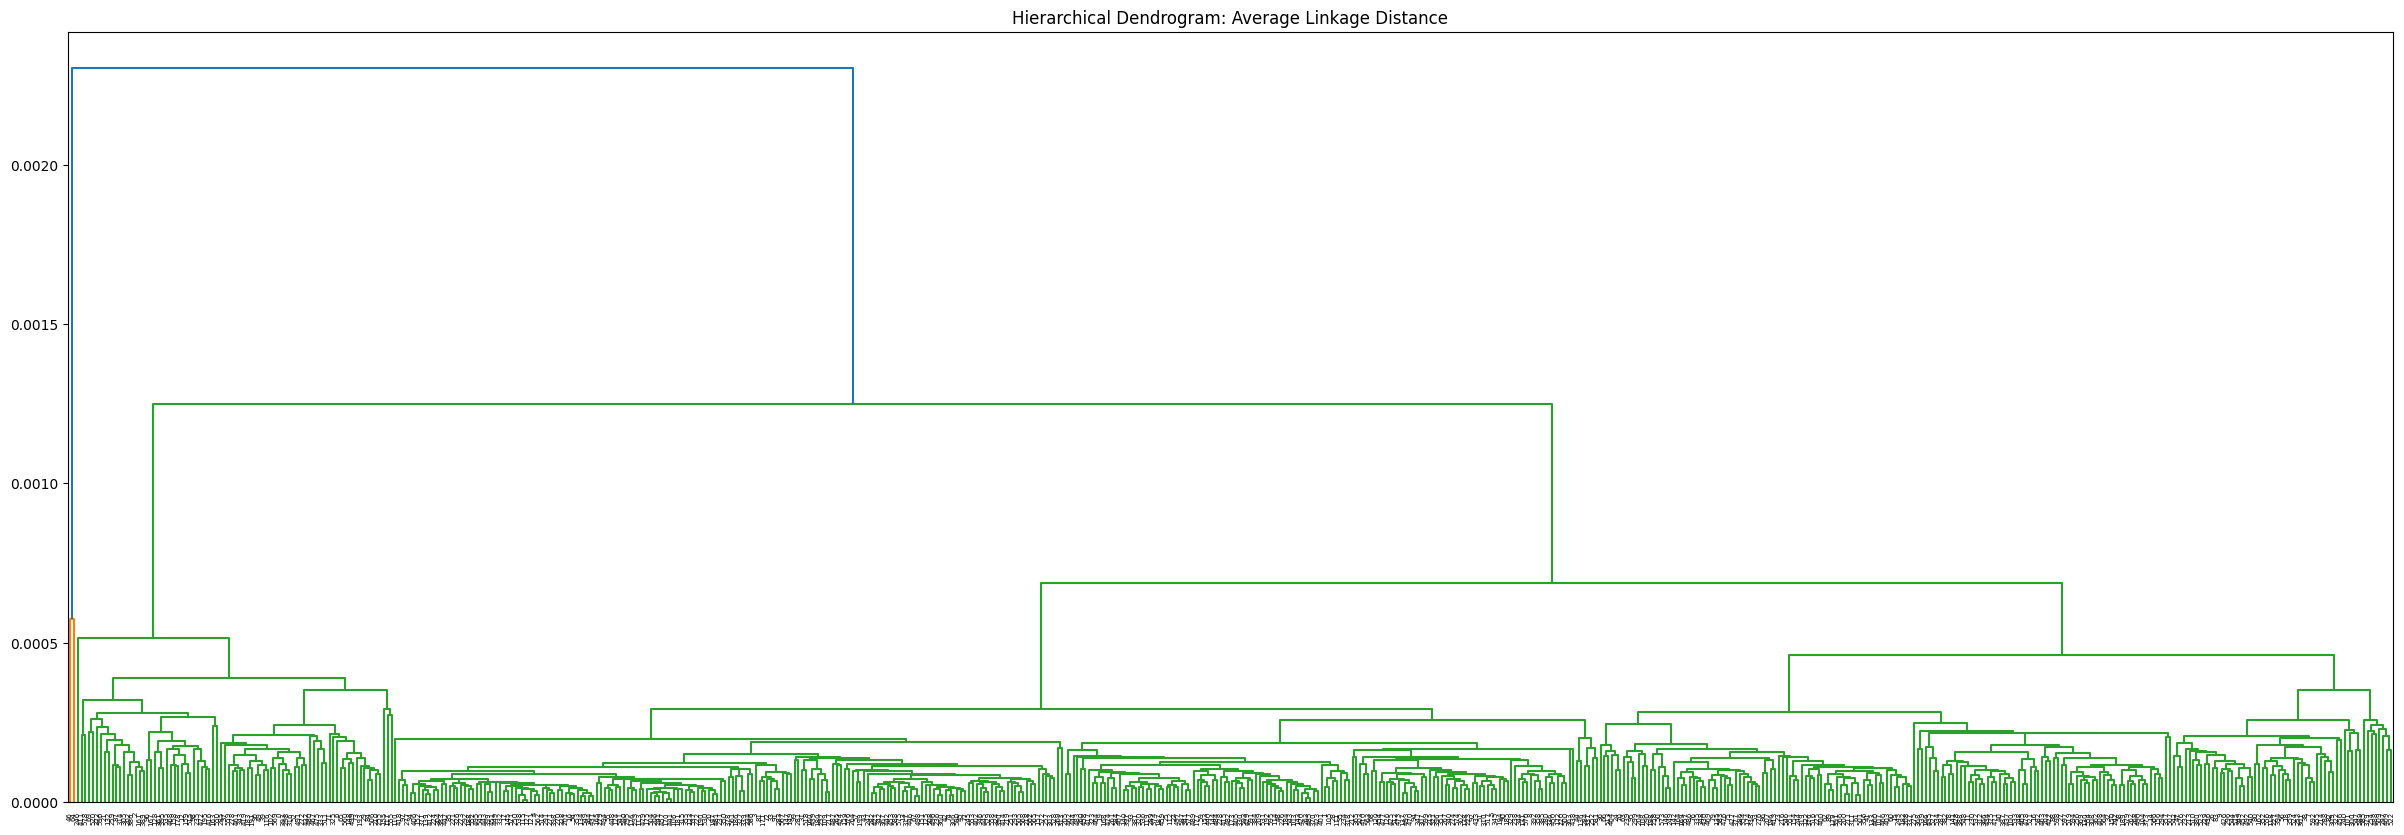


Maximum distance between merged clusters using Average linkage = 0.002302 (rounded to the 6th decimal)

Default threshold for cluster formation using Average linkage = 0.001612 (rounded to the 6th decimal)


In [89]:
#Draw the dentrogram
hc_average_linkage = hc.linkage(bankcustomers_df_v3, method='average', metric="euclidean")
plt.figure(figsize=(30, 10))
plt.title("Hierarchical Dendrogram: Average Linkage Distance")
dg_average = hc.dendrogram(hc_average_linkage)
plt.show()

maxdist_average = max(hc_average_linkage[:,2])

print(f"\nMaximum distance between merged clusters using Average linkage = {maxdist_average:.6f} (rounded to the 6th decimal)")
print(f"\nDefault threshold for cluster formation using Average linkage = {0.7*maxdist_average:.6f} (rounded to the 6th decimal)")

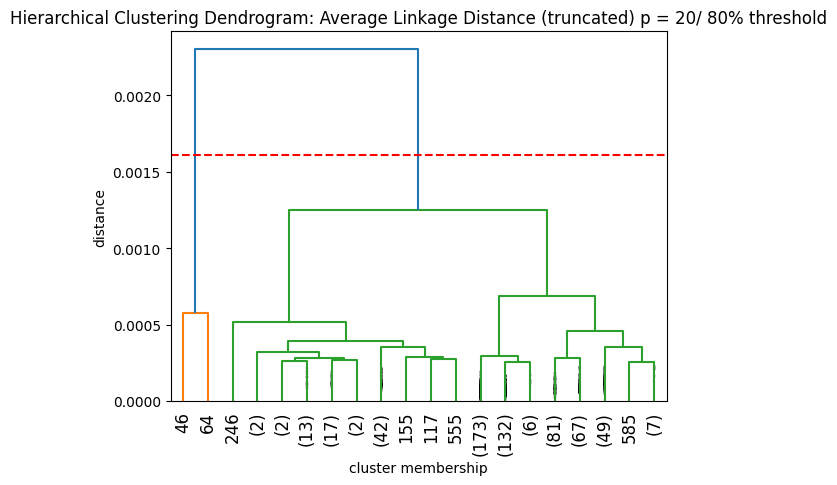

In [90]:
#Display truncated dendogram with a horizontal line to separate with p = 20
plt.title('Hierarchical Clustering Dendrogram: Average Linkage Distance (truncated) p = 20/ 80% threshold')
plt.xlabel('cluster membership')
plt.ylabel('distance')
hc.dendrogram(hc_average_linkage, truncate_mode='lastp', p=20, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.axhline(y=0.7*max(hc_average_linkage[:,2]), color='r', linestyle='--')
plt.show()

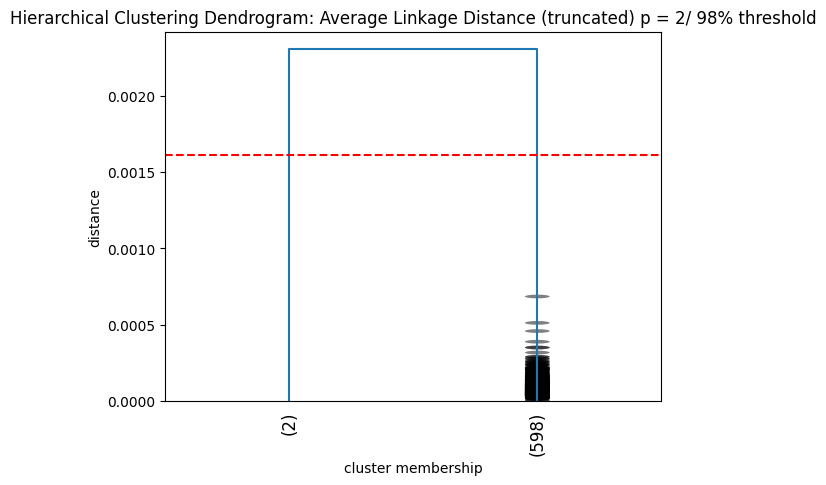

In [94]:
#Display truncated dendogram with a horizontal line to separate with p = 2
plt.title('Hierarchical Clustering Dendrogram: Average Linkage Distance (truncated) p = 2/ 98% threshold')
plt.xlabel('cluster membership')
plt.ylabel('distance')
hc.dendrogram(hc_average_linkage, truncate_mode='lastp', p=2, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.axhline(y=0.7*max(hc_average_linkage[:,2]), color='r', linestyle='--')
plt.show()

In [92]:
#Identify Cluster Membership
clusters_average = fcluster(hc_average_linkage,0.7* maxdist_average, criterion='distance')
clusters_average

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [95]:
bankcustomers_df_v2['cluster'] = clusters_average
print(bankcustomers_df_v2.head())
dfAvg = bankcustomers_df_v2.groupby('cluster', as_index=False).mean()
dfAvg

   age  sex   income  married  children  car  savings  checking  mortgage  \
0   48    1  17546.0        0         1    0        0         0         0   
1   40    0  30085.1        1         3    1        0         1         1   
2   51    1  16575.4        1         0    1        1         1         0   
3   23    1  20375.4        1         3    0        0         1         0   
4   57    1  50576.3        1         0    0        1         0         0   

   pep  inner city  town  rural  suburban  cluster  
0    1         1.0   0.0    0.0       0.0        2  
1    0         0.0   1.0    0.0       0.0        2  
2    0         1.0   0.0    0.0       0.0        2  
3    0         0.0   1.0    0.0       0.0        2  
4    0         0.0   0.0    1.0       0.0        2  


,cluster,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner city,town,rural,suburban
0,1,35.50000,0.5,9149.055000,0.000000,0.500000,1.000000,1.000000,1.000000,0.500000,0.500000,0.500000,0.500000,0.000000,0.000000
1,2,42.41806,0.5,27585.485987,0.662207,1.013378,0.491639,0.688963,0.757525,0.347826,0.456522,0.448161,0.287625,0.160535,0.103679


### Hierarchical Clustering: Ward linkage

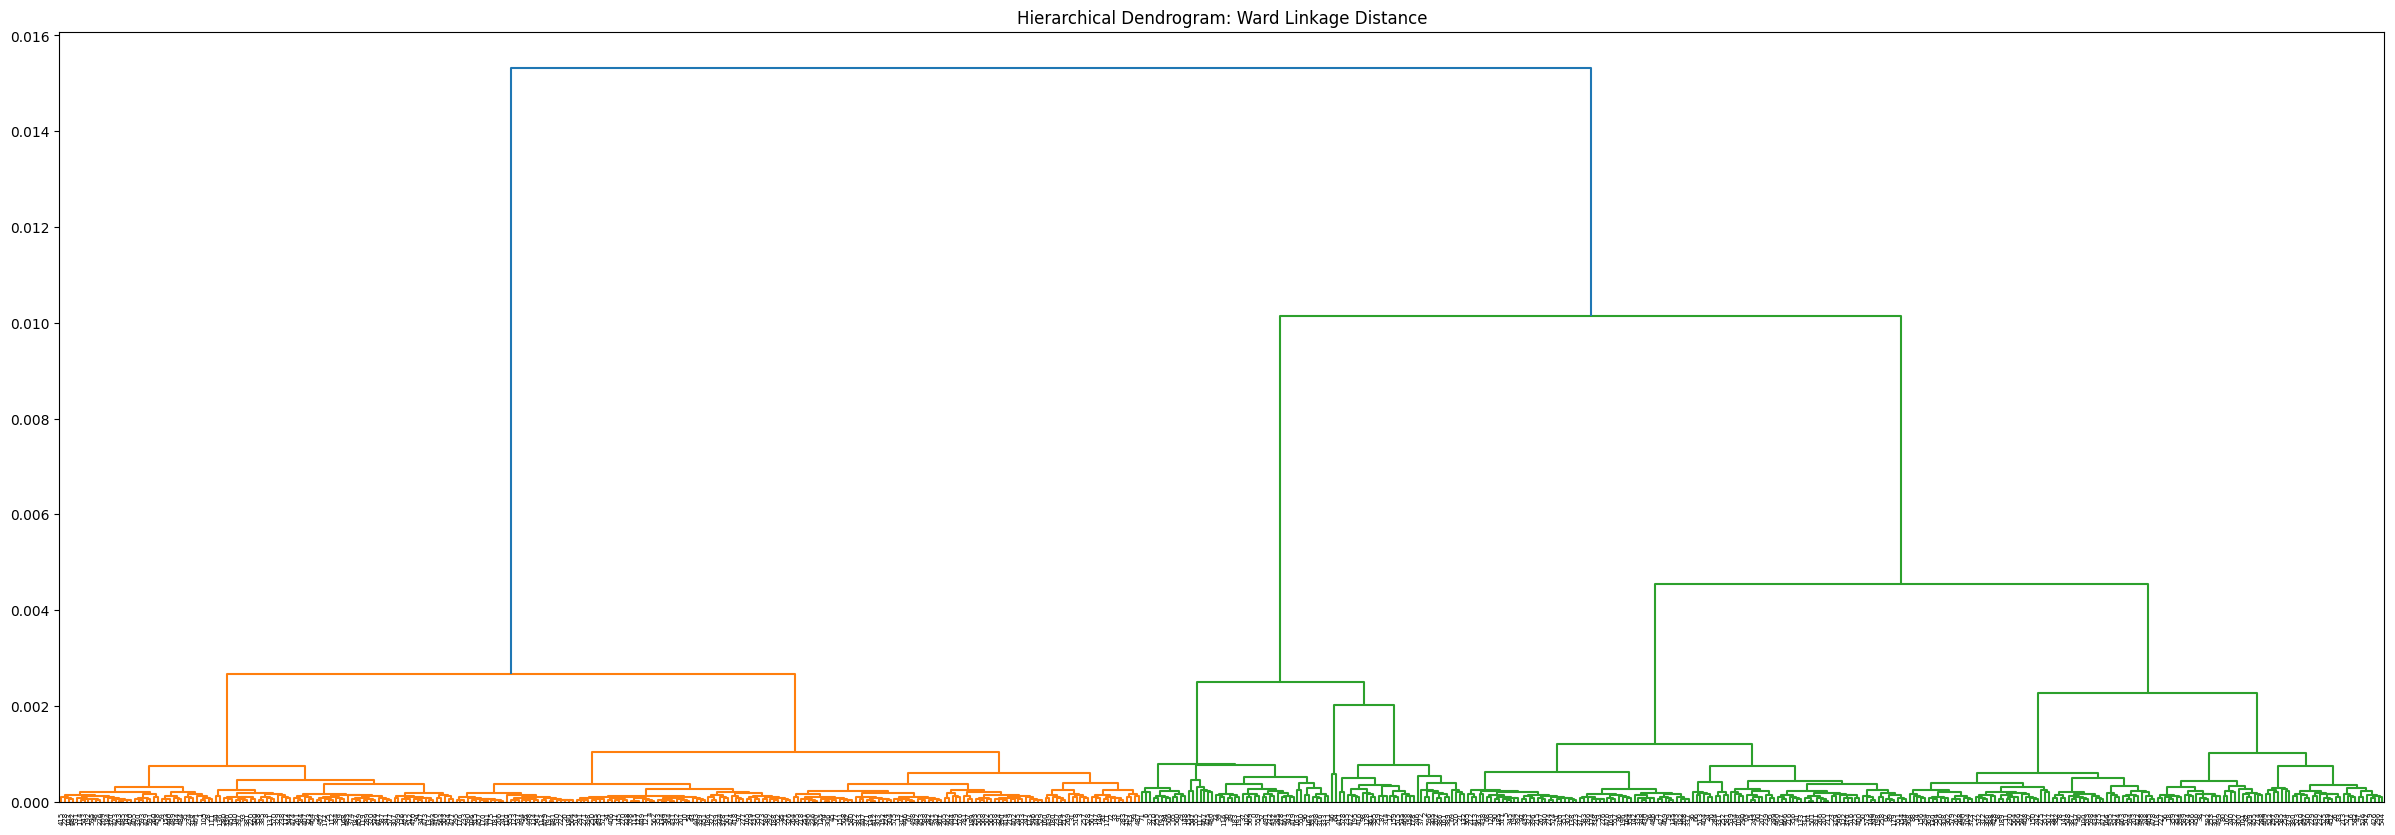


Maximum distance between merged clusters using Ward linkage = 0.015312 (rounded to the 6th decimal)

Default threshold for cluster formation using Ward linkage = 0.010718 (rounded to the 6th decimal)


In [96]:
#Draw the dentrogram
hc_ward_linkage = hc.linkage(bankcustomers_df_v3, method='ward', metric="euclidean")
plt.figure(figsize=(30, 10))
plt.title("Hierarchical Dendrogram: Ward Linkage Distance")
dg_ward = hc.dendrogram(hc_ward_linkage)
plt.show()

maxdist_ward = max(hc_ward_linkage[:,2])

print(f"\nMaximum distance between merged clusters using Ward linkage = {maxdist_ward:.6f} (rounded to the 6th decimal)")
print(f"\nDefault threshold for cluster formation using Ward linkage = {0.7*maxdist_ward:.6f} (rounded to the 6th decimal)")

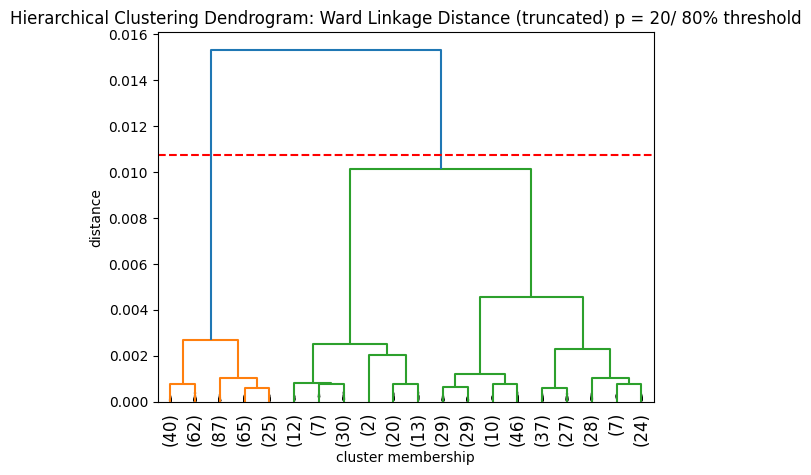

In [97]:
#Display truncated dendogram with a horizontal line to separate with p = 20
plt.title('Hierarchical Clustering Dendrogram: Ward Linkage Distance (truncated) p = 20/ 80% threshold')
plt.xlabel('cluster membership')
plt.ylabel('distance')
hc.dendrogram(hc_ward_linkage, truncate_mode='lastp', p=20, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.axhline(y=0.7*max(hc_ward_linkage[:,2]), color='r', linestyle='--')
plt.show()

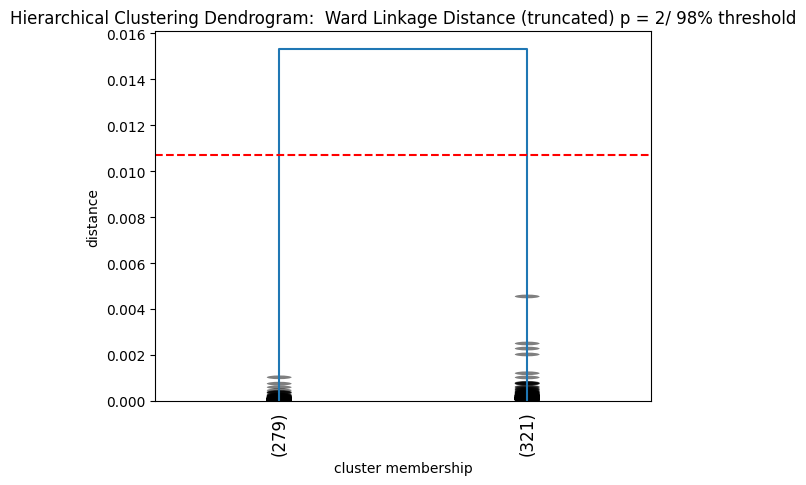

In [98]:
#Display truncated dendogram with a horizontal line to separate with p = 2
plt.title('Hierarchical Clustering Dendrogram:  Ward Linkage Distance (truncated) p = 2/ 98% threshold')
plt.xlabel('cluster membership')
plt.ylabel('distance')
hc.dendrogram(hc_ward_linkage, truncate_mode='lastp', p=2, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.axhline(y=0.7*max(hc_ward_linkage[:,2]), color='r', linestyle='--')
plt.show()

In [99]:
#Identify cluster membership
clusters_ward = fcluster(hc_ward_linkage, 0.7 * maxdist_ward, criterion = 'distance')
clusters_ward

array([2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2,

In [100]:
bankcustomers_df_v2['cluster'] = clusters_ward
print(bankcustomers_df_v2.head())
dfAvg = bankcustomers_df_v2.groupby('cluster', as_index=False).mean()
dfAvg

   age  sex   income  married  children  car  savings  checking  mortgage  \
0   48    1  17546.0        0         1    0        0         0         0   
1   40    0  30085.1        1         3    1        0         1         1   
2   51    1  16575.4        1         0    1        1         1         0   
3   23    1  20375.4        1         3    0        0         1         0   
4   57    1  50576.3        1         0    0        1         0         0   

   pep  inner city  town  rural  suburban  cluster  
0    1         1.0   0.0    0.0       0.0        2  
1    0         0.0   1.0    0.0       0.0        1  
2    0         1.0   0.0    0.0       0.0        2  
3    0         0.0   1.0    0.0       0.0        1  
4    0         0.0   0.0    1.0       0.0        1  


,cluster,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner city,town,rural,suburban
0,1,43.100358,0.480287,35450.250179,0.641577,1.064516,0.526882,0.770609,0.788530,0.351254,0.519713,0.451613,0.258065,0.193548,0.096774
1,2,41.781931,0.517134,20634.887632,0.676012,0.965732,0.464174,0.619938,0.732087,0.345794,0.401869,0.445483,0.314642,0.130841,0.109034


## 3. Applying K-means Clustering
Apply k-means clustering to the dataset.

Try different values of k (4, 5, 6, 7, and 8 at least); make sure you include the number of clusters you decided to use with hierarchical clustering.

### K-means Clustering with k = 2

In [101]:
#Perform K-means clustering
kmean_clstr2 = km(n_clusters=2, random_state=0)
kmean_clstr2.fit(bankcustomers_df_v3)

KMeans(n_clusters=2, random_state=0)

In [102]:
#Cluster centers
print(f"Cluster centers: \n",kmean_clstr2.cluster_centers_)

#Assign cluster membership labels
kmean_clstr2_labels = kmean_clstr2.labels_
print(f"\nCluster memership labels: \n",kmean_clstr2_labels)

Cluster centers: 
 [[1.38562106e-03 1.76853891e-05 9.99999002e-01 2.50040429e-05
  3.70169626e-05 1.81433671e-05 2.53768348e-05 2.92608318e-05
  1.30843483e-05 1.62578757e-05 1.69322608e-05 1.00372206e-05
  6.22391377e-06 4.05574037e-06]
 [2.43330381e-03 3.39653653e-05 9.99996946e-01 4.14794237e-05
  6.71707302e-05 2.99276465e-05 4.02252627e-05 4.82877064e-05
  2.31249596e-05 2.37899662e-05 3.17461070e-05 2.06841914e-05
  8.27724119e-06 5.85380526e-06]]

Cluster memership labels: 
 [1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0
 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1
 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 

In [103]:
#Add to the dataframe
bankcustomers_df_v2 = bankcustomers_df_v3.copy()
bankcustomers_df_v2['cluster'] = kmean_clstr2_labels

#Check cluster sizes
print(f"Cluster sizes: \n",bankcustomers_df_v2['cluster'].value_counts(),"\n")

#Get averages by cluster to see cluster variances
kmean_clstr2_avg = bankcustomers_df_v2.groupby('cluster').mean()
print("\nAverages by cluster\n")
kmean_clstr2_avg

Cluster sizes: 
 cluster
0    418
1    182
Name: count, dtype: int64 


Averages by cluster



,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner city,town,rural,suburban
cluster,,,,,,,,,,,,,,
0,0.001386,0.000018,0.999999,0.000025,0.000037,0.000018,0.000025,0.000029,0.000013,0.000016,0.000017,0.000010,0.000006,0.000004
1,0.002433,0.000034,0.999997,0.000041,0.000067,0.000030,0.000040,0.000048,0.000023,0.000024,0.000032,0.000021,0.000008,0.000006


### K-means Clustering with k = 4

In [104]:
#Perform K-means clustering
kmean_clstr4 = km(n_clusters=4, random_state=0)
kmean_clstr4.fit(bankcustomers_df_v3)

KMeans(n_clusters=4, random_state=0)

In [105]:
#Cluster centers
print(f"Cluster centers: \n",kmean_clstr4.cluster_centers_)

#Assign cluster membership labels
kmean_clstr4_labels = kmean_clstr4.labels_
print(f"\nCluster memership labels: \n",kmean_clstr4_labels)

Cluster centers: 
 [[2.80946987e-03 3.75914630e-05 9.99996000e-01 4.14068433e-05
  6.74910250e-05 2.93494693e-05 3.86041136e-05 5.26327755e-05
  2.58092961e-05 2.49006920e-05 3.94050719e-05 2.13062130e-05
  8.07902384e-06 4.81510478e-06]
 [1.20348038e-03 1.48040826e-05 9.99999266e-01 2.08181539e-05
  3.25116788e-05 1.62841535e-05 2.30022167e-05 2.52937057e-05
  1.10243063e-05 1.68899260e-05 1.40700848e-05 8.67432391e-06
  5.96955489e-06 3.21229402e-06]
 [1.64913300e-03 2.15172802e-05 9.99998623e-01 3.11507632e-05
  4.34889363e-05 1.99820313e-05 2.88961752e-05 3.46735171e-05
  1.61815267e-05 1.48184475e-05 2.16675211e-05 1.24354430e-05
  6.20425056e-06 4.67901997e-06]
 [2.13355557e-03 3.14456133e-05 9.99997696e-01 4.11823291e-05
  6.62014440e-05 3.13337183e-05 4.09088799e-05 4.52425118e-05
  2.07907444e-05 2.33381739e-05 2.49365619e-05 1.92715926e-05
  8.94564262e-06 7.54208325e-06]]

Cluster memership labels: 
 [0 1 0 1 1 2 0 3 2 3 1 3 0 1 2 2 3 1 3 1 1 0 1 2 2 1 3 3 1 0 0 1 3 1 1 1 2


In [106]:
#Add to the dataframe
bankcustomers_df_v4 = bankcustomers_df_v3.copy()
bankcustomers_df_v4['cluster'] = kmean_clstr4_labels

#Check cluster sizes
print(f"Cluster sizes: \n",bankcustomers_df_v4['cluster'].value_counts(),"\n")

#Get averages by cluster to see cluster variances
kmean_clstr4_avg = bankcustomers_df_v4.groupby('cluster').mean()
print("\nAverages by cluster\n")
kmean_clstr4_avg

Cluster sizes: 
 cluster
1    250
2    163
3    108
0     79
Name: count, dtype: int64 


Averages by cluster



,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner city,town,rural,suburban
cluster,,,,,,,,,,,,,,
0,0.002809,0.000038,0.999996,0.000041,0.000067,0.000029,0.000039,0.000053,0.000026,0.000025,0.000039,0.000021,0.000008,0.000005
1,0.001203,0.000015,0.999999,0.000021,0.000033,0.000016,0.000023,0.000025,0.000011,0.000017,0.000014,0.000009,0.000006,0.000003
2,0.001649,0.000022,0.999999,0.000031,0.000043,0.000020,0.000029,0.000035,0.000016,0.000015,0.000022,0.000012,0.000006,0.000005
3,0.002134,0.000031,0.999998,0.000041,0.000066,0.000031,0.000041,0.000045,0.000021,0.000023,0.000025,0.000019,0.000009,0.000008


### K-means Clustering with k = 5

In [107]:
#Perform K-means clustering
kmean_clstr5 = km(n_clusters=5, random_state=0)
kmean_clstr5.fit(bankcustomers_df_v3)

KMeans(n_clusters=5, random_state=0)

In [108]:
#Cluster centers
print(f"Cluster centers: \n",kmean_clstr5.cluster_centers_)

#Assign cluster membership labels
kmean_clstr5_labels = kmean_clstr5.labels_
print(f"\nCluster memership labels: \n",kmean_clstr5_labels)

Cluster centers: 
 [[1.45071563e-03 1.93271408e-05 9.99998937e-01 2.70960256e-05
  4.11717525e-05 1.82899631e-05 2.66093063e-05 3.00828892e-05
  1.47493443e-05 1.56838781e-05 1.77675421e-05 9.95245037e-06
  7.26294615e-06 4.00775052e-06]
 [2.83832283e-03 3.85808069e-05 9.99995919e-01 4.28075139e-05
  7.22829476e-05 3.07806897e-05 4.17585697e-05 5.32909480e-05
  2.62658001e-05 2.16958953e-05 4.06158959e-05 2.19102932e-05
  6.72764747e-06 5.28323997e-06]
 [2.26291374e-03 3.23048335e-05 9.99997415e-01 4.31878309e-05
  6.48765588e-05 2.76154140e-05 4.24350736e-05 4.34994608e-05
  1.90446818e-05 2.64715753e-05 2.49406491e-05 2.09198122e-05
  9.03659475e-06 8.68031169e-06]
 [1.15451886e-03 1.50547138e-05 9.99999327e-01 2.05705250e-05
  3.06530602e-05 1.56824776e-05 2.17367921e-05 2.48329379e-05
  1.08197140e-05 1.61332735e-05 1.35483721e-05 8.43822284e-06
  5.46181251e-06 3.47736549e-06]
 [1.82715879e-03 2.28218673e-05 9.99998314e-01 3.23122721e-05
  4.90625358e-05 2.58321140e-05 3.15446769e

In [109]:
#Add to the dataframe
bankcustomers_df_v5 = bankcustomers_df_v3.copy()
bankcustomers_df_v5['cluster'] = kmean_clstr5_labels

#Check cluster sizes
print(f"Cluster sizes: \n",bankcustomers_df_v5['cluster'].value_counts(),"\n")

#Get averages by cluster to see cluster variances
kmean_clstr5_avg = bankcustomers_df_v5.groupby('cluster').mean()
print("\nAverages by cluster\n")
kmean_clstr5_avg


Cluster sizes: 
 cluster
3    191
0    135
4    128
2     74
1     72
Name: count, dtype: int64 


Averages by cluster



,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner city,town,rural,suburban
cluster,,,,,,,,,,,,,,
0,0.001451,0.000019,0.999999,0.000027,0.000041,0.000018,0.000027,0.000030,0.000015,0.000016,0.000018,0.000010,0.000007,0.000004
1,0.002838,0.000039,0.999996,0.000043,0.000072,0.000031,0.000042,0.000053,0.000026,0.000022,0.000041,0.000022,0.000007,0.000005
2,0.002263,0.000032,0.999997,0.000043,0.000065,0.000028,0.000042,0.000043,0.000019,0.000026,0.000025,0.000021,0.000009,0.000009
3,0.001155,0.000015,0.999999,0.000021,0.000031,0.000016,0.000022,0.000025,0.000011,0.000016,0.000014,0.000008,0.000005,0.000003
4,0.001827,0.000023,0.999998,0.000032,0.000049,0.000026,0.000032,0.000040,0.000018,0.000019,0.000024,0.000015,0.000007,0.000004


### K-means Clustering with k = 6

In [110]:
#Perform K-means clustering
kmean_clstr6 = km(n_clusters=6, random_state=0)
kmean_clstr6.fit(bankcustomers_df_v3)

KMeans(n_clusters=6, random_state=0)

In [111]:
#Cluster centers
print(f"Cluster centers: \n",kmean_clstr6.cluster_centers_)

#Assign cluster membership labels
kmean_clstr6_labels = kmean_clstr6.labels_
print(f"\nCluster memership labels: \n",kmean_clstr6_labels)

Cluster centers: 
 [[1.45967284e-03 1.92635084e-05 9.99998924e-01 2.71665673e-05
  4.14331559e-05 1.80835931e-05 2.62388319e-05 2.99091418e-05
  1.46160592e-05 1.62041971e-05 1.79312830e-05 1.00046470e-05
  7.34120765e-06 3.97828176e-06]
 [2.26784104e-03 3.30287747e-05 9.99997404e-01 4.30220667e-05
  6.60888908e-05 2.91934377e-05 4.48599350e-05 4.39679298e-05
  1.89829619e-05 2.68342494e-05 2.42657504e-05 2.15816685e-05
  9.55297160e-06 9.17632950e-06]
 [1.15687002e-03 1.49270521e-05 9.99999324e-01 2.05681202e-05
  3.04944734e-05 1.56505180e-05 2.17163522e-05 2.47646195e-05
  1.08629517e-05 1.59889331e-05 1.34441634e-05 8.41298562e-06
  5.48249469e-06 3.42359180e-06]
 [1.83817835e-03 2.30356044e-05 9.99998293e-01 3.29074102e-05
  4.97380443e-05 2.57908637e-05 3.14980222e-05 4.12024206e-05
  1.82654235e-05 1.83959871e-05 2.47445472e-05 1.47958419e-05
  7.03107883e-06 4.19474455e-06]
 [2.80215625e-03 3.86716809e-05 9.99996041e-01 4.40181804e-05
  7.22407559e-05 2.73450655e-05 3.84775635e

In [112]:
#Add to the dataframe
bankcustomers_df_v6 = bankcustomers_df_v3.copy()
bankcustomers_df_v6['cluster'] = kmean_clstr6_labels

#Check cluster sizes
print(f"Cluster sizes: \n",bankcustomers_df_v6['cluster'].value_counts(),"\n")

#Get averages by cluster to see cluster variances
kmean_clstr6_avg = bankcustomers_df_v6.groupby('cluster').mean()
print("\nAverages by cluster\n")
kmean_clstr6_avg

Cluster sizes: 
 cluster
2    194
0    136
3    127
4     71
1     70
5      2
Name: count, dtype: int64 


Averages by cluster



,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner city,town,rural,suburban
cluster,,,,,,,,,,,,,,
0,0.001460,0.000019,0.999999,0.000027,0.000041,0.000018,0.000026,0.000030,0.000015,0.000016,0.000018,0.000010,0.000007,0.000004
1,0.002268,0.000033,0.999997,0.000043,0.000066,0.000029,0.000045,0.000044,0.000019,0.000027,0.000024,0.000022,0.000010,0.000009
2,0.001157,0.000015,0.999999,0.000021,0.000030,0.000016,0.000022,0.000025,0.000011,0.000016,0.000013,0.000008,0.000005,0.000003
3,0.001838,0.000023,0.999998,0.000033,0.000050,0.000026,0.000031,0.000041,0.000018,0.000018,0.000025,0.000015,0.000007,0.000004
4,0.002802,0.000039,0.999996,0.000044,0.000072,0.000027,0.000038,0.000050,0.000024,0.000022,0.000041,0.000019,0.000007,0.000005
5,0.003976,0.000038,0.999992,0.000000,0.000038,0.000137,0.000137,0.000137,0.000100,0.000038,0.000038,0.000100,0.000000,0.000000


### K-means Clustering with k = 7

In [113]:
#Perform K-means clustering
kmean_clstr7 = km(n_clusters=7, random_state=0)
kmean_clstr7.fit(bankcustomers_df_v3)

KMeans(n_clusters=7, random_state=0)

In [114]:
#Cluster centers
print(f"Cluster centers: \n",kmean_clstr7.cluster_centers_)

#Assign cluster membership labels
kmean_clstr7_labels = kmean_clstr7.labels_
print(f"\nCluster memership labels: \n",kmean_clstr7_labels)

Cluster centers: 
 [[1.14541246e-03 1.50125419e-05 9.99999338e-01 2.06860204e-05
  3.15666019e-05 1.52859640e-05 2.14947960e-05 2.50610921e-05
  1.04123437e-05 1.60378533e-05 1.30070324e-05 8.83507602e-06
  5.82796754e-06 3.11811736e-06]
 [2.80944799e-03 3.85699176e-05 9.99996020e-01 4.46687101e-05
  7.43346908e-05 2.75403540e-05 3.95928552e-05 5.10293192e-05
  2.45174807e-05 2.09508793e-05 4.06934887e-05 1.99726039e-05
  7.02015388e-06 5.51294606e-06]
 [1.97143773e-03 2.46397839e-05 9.99998039e-01 3.81125644e-05
  6.47880805e-05 2.78329318e-05 3.42136652e-05 4.41230686e-05
  2.28289539e-05 1.99543991e-05 2.05018976e-05 2.01309217e-05
  9.64942688e-06 6.34096834e-06]
 [2.32304417e-03 3.51651518e-05 9.99997282e-01 4.24237306e-05
  5.04847249e-05 2.93473326e-05 4.22633066e-05 4.32489241e-05
  1.77258326e-05 2.87429467e-05 2.83756814e-05 1.69568565e-05
  8.13673029e-06 8.30160899e-06]
 [1.40585505e-03 1.70898302e-05 9.99999004e-01 2.43646672e-05
  3.66646787e-05 1.88647498e-05 2.61957488e

In [115]:
#Add to the dataframe
bankcustomers_df_v7 = bankcustomers_df_v3.copy()
bankcustomers_df_v7['cluster'] = kmean_clstr7_labels

#Check cluster sizes
print(f"Cluster sizes: \n",bankcustomers_df_v7['cluster'].value_counts(),"\n")

#Get averages by cluster to see cluster variances
kmean_clstr7_avg = bankcustomers_df_v7.groupby('cluster').mean()
print("\nAverages by cluster\n")
kmean_clstr7_avg

Cluster sizes: 
 cluster
0    179
4    122
5     94
2     77
1     69
3     57
6      2
Name: count, dtype: int64 


Averages by cluster



,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner city,town,rural,suburban
cluster,,,,,,,,,,,,,,
0,0.001145,0.000015,0.999999,0.000021,0.000032,0.000015,0.000021,0.000025,0.000010,0.000016,0.000013,0.000009,0.000006,0.000003
1,0.002809,0.000039,0.999996,0.000045,0.000074,0.000028,0.000040,0.000051,0.000025,0.000021,0.000041,0.000020,0.000007,0.000006
2,0.001971,0.000025,0.999998,0.000038,0.000065,0.000028,0.000034,0.000044,0.000023,0.000020,0.000021,0.000020,0.000010,0.000006
3,0.002323,0.000035,0.999997,0.000042,0.000050,0.000029,0.000042,0.000043,0.000018,0.000029,0.000028,0.000017,0.000008,0.000008
4,0.001406,0.000017,0.999999,0.000024,0.000037,0.000019,0.000026,0.000028,0.000013,0.000016,0.000017,0.000009,0.000007,0.000004
5,0.001697,0.000023,0.999999,0.000031,0.000048,0.000021,0.000030,0.000037,0.000017,0.000017,0.000026,0.000012,0.000005,0.000004
6,0.003976,0.000038,0.999992,0.000000,0.000038,0.000137,0.000137,0.000137,0.000100,0.000038,0.000038,0.000100,0.000000,0.000000


### K-means Clustering with k = 8

In [116]:
#Perform K-means clustering
kmean_clstr8 = km(n_clusters=8, random_state=0)
kmean_clstr8.fit(bankcustomers_df_v3)

KMeans(random_state=0)

In [117]:
#Cluster centers
print(f"Cluster centers: \n",kmean_clstr8.cluster_centers_)

#Assign cluster membership labels
kmean_clstr8_labels = kmean_clstr8.labels_
print(f"\nCluster memership labels: \n",kmean_clstr8_labels)

Cluster centers: 
 [[1.96722651e-03 2.52968448e-05 9.99998048e-01 3.75065313e-05
  6.57024787e-05 2.77660591e-05 3.43127456e-05 4.44863998e-05
  2.26286418e-05 1.88641482e-05 1.94262467e-05 2.06677463e-05
  9.90674493e-06 6.51006083e-06]
 [1.14612815e-03 1.52369256e-05 9.99999337e-01 2.08788849e-05
  3.13912319e-05 1.55088287e-05 2.13753805e-05 2.52296506e-05
  1.06622841e-05 1.62565408e-05 1.32425578e-05 8.78599227e-06
  5.79558994e-06 3.10079449e-06]
 [2.65170211e-03 3.19841433e-05 9.99996464e-01 3.97818029e-05
  6.99878301e-05 2.35756681e-05 3.28441410e-05 4.87582555e-05
  2.74160675e-05 2.63485650e-05 2.82211162e-05 2.30947597e-05
  9.90600373e-06 5.53015882e-06]
 [1.41285743e-03 1.66758844e-05 9.99998993e-01 2.45017620e-05
  3.69524139e-05 1.85765492e-05 2.69832109e-05 2.72753159e-05
  1.27834865e-05 1.53432213e-05 1.64653962e-05 9.25721507e-06
  7.19315026e-06 3.85742280e-06]
 [2.28486301e-03 3.47311951e-05 9.99997372e-01 4.60947184e-05
  5.51217033e-05 3.11738359e-05 4.75862120e

In [118]:
#Add to the dataframe
bankcustomers_df_v8 = bankcustomers_df_v3.copy()
bankcustomers_df_v8['cluster'] = kmean_clstr8_labels

#Check cluster sizes
print(f"Cluster sizes: \n",bankcustomers_df_v8['cluster'].value_counts(),"\n")

#Get averages by cluster to see cluster variances
kmean_clstr8_avg = bankcustomers_df_v8.groupby('cluster').mean()
print("\nAverages by cluster\n")
kmean_clstr8_avg

Cluster sizes: 
 cluster
1    180
3    126
7     89
0     75
4     51
2     46
5     31
6      2
Name: count, dtype: int64 


Averages by cluster



,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner city,town,rural,suburban
cluster,,,,,,,,,,,,,,
0,0.001967,0.000025,0.999998,0.000038,0.000066,0.000028,0.000034,0.000044,0.000023,0.000019,0.000019,0.000021,0.000010,0.000007
1,0.001146,0.000015,0.999999,0.000021,0.000031,0.000016,0.000021,0.000025,0.000011,0.000016,0.000013,0.000009,0.000006,0.000003
2,0.002652,0.000032,0.999996,0.000040,0.000070,0.000024,0.000033,0.000049,0.000027,0.000026,0.000028,0.000023,0.000010,0.000006
3,0.001413,0.000017,0.999999,0.000025,0.000037,0.000019,0.000027,0.000027,0.000013,0.000015,0.000016,0.000009,0.000007,0.000004
4,0.002285,0.000035,0.999997,0.000046,0.000055,0.000031,0.000048,0.000042,0.000018,0.000026,0.000030,0.000017,0.000006,0.000009
5,0.002968,0.000046,0.999996,0.000046,0.000066,0.000031,0.000041,0.000053,0.000019,0.000022,0.000056,0.000014,0.000006,0.000004
6,0.003976,0.000038,0.999992,0.000000,0.000038,0.000137,0.000137,0.000137,0.000100,0.000038,0.000038,0.000100,0.000000,0.000000
7,0.001705,0.000024,0.999999,0.000031,0.000049,0.000021,0.000030,0.000038,0.000017,0.000018,0.000026,0.000013,0.000005,0.000004


### K-means Clustering with k = 10

In [119]:
#Perform K-means clustering
kmean_clstr10 = km(n_clusters=10, random_state=0)
kmean_clstr10.fit(bankcustomers_df_v3)

KMeans(n_clusters=10, random_state=0)

In [120]:
#Cluster centers
print(f"Cluster centers: \n",kmean_clstr10.cluster_centers_)

#Assign cluster membership labels
kmean_clstr10_labels = kmean_clstr10.labels_
print(f"\nCluster memership labels: \n",kmean_clstr10_labels)

Cluster centers: 
 [[1.09882193e-03 1.41653884e-05 9.99999392e-01 1.86712453e-05
  3.03796977e-05 1.21663660e-05 1.91765473e-05 2.32757908e-05
  9.72542961e-06 1.71725337e-05 1.31118830e-05 7.46500927e-06
  5.33671477e-06 2.91027807e-06]
 [2.29121015e-03 3.61487949e-05 9.99997357e-01 4.54929189e-05
  5.61267463e-05 3.12078432e-05 4.82836840e-05 4.29169886e-05
  1.76035852e-05 2.43282150e-05 2.83171926e-05 1.75692062e-05
  6.32533390e-06 9.65697372e-06]
 [1.76727792e-03 2.16177987e-05 9.99998427e-01 3.11904211e-05
  4.60013761e-05 2.21243242e-05 3.26928623e-05 3.93725437e-05
  1.52523522e-05 1.69374425e-05 2.56641724e-05 1.42426657e-05
  5.37132193e-06 3.86278035e-06]
 [2.65170211e-03 3.19841433e-05 9.99996464e-01 3.97818029e-05
  6.99878301e-05 2.35756681e-05 3.28441410e-05 4.87582555e-05
  2.74160675e-05 2.63485650e-05 2.82211162e-05 2.30947597e-05
  9.90600373e-06 5.53015882e-06]
 [1.38916106e-03 1.59863541e-05 9.99999028e-01 2.32332142e-05
  4.41789009e-05 1.96856077e-05 2.74026647e

In [121]:
#Add to the dataframe
bankcustomers_df_v10 = bankcustomers_df_v3.copy()
bankcustomers_df_v10['cluster'] = kmean_clstr10_labels

#Check cluster sizes
print(f"Cluster sizes: \n",bankcustomers_df_v10['cluster'].value_counts(),"\n")

#Get averages by cluster to see cluster variances
kmean_clstr10_avg = bankcustomers_df_v10.groupby('cluster').mean()
print("\nAverages by cluster\n")
kmean_clstr10_avg

Cluster sizes: 
 cluster
0    112
9     82
4     79
2     77
5     62
6     60
1     49
3     46
7     31
8      2
Name: count, dtype: int64 


Averages by cluster



,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner city,town,rural,suburban
cluster,,,,,,,,,,,,,,
0,0.001099,0.000014,0.999999,0.000019,0.000030,0.000012,0.000019,0.000023,0.000010,0.000017,0.000013,0.000007,0.000005,0.000003
1,0.002291,0.000036,0.999997,0.000045,0.000056,0.000031,0.000048,0.000043,0.000018,0.000024,0.000028,0.000018,0.000006,0.000010
2,0.001767,0.000022,0.999998,0.000031,0.000046,0.000022,0.000033,0.000039,0.000015,0.000017,0.000026,0.000014,0.000005,0.000004
3,0.002652,0.000032,0.999996,0.000040,0.000070,0.000024,0.000033,0.000049,0.000027,0.000026,0.000028,0.000023,0.000010,0.000006
4,0.001389,0.000016,0.999999,0.000023,0.000044,0.000020,0.000027,0.000028,0.000013,0.000016,0.000019,0.000008,0.000008,0.000002
5,0.001997,0.000026,0.999998,0.000038,0.000072,0.000032,0.000035,0.000046,0.000023,0.000021,0.000021,0.000021,0.000011,0.000007
6,0.001562,0.000023,0.999999,0.000032,0.000037,0.000016,0.000024,0.000031,0.000017,0.000016,0.000017,0.000012,0.000006,0.000006
7,0.002968,0.000046,0.999996,0.000046,0.000066,0.000031,0.000041,0.000053,0.000019,0.000022,0.000056,0.000014,0.000006,0.000004
8,0.003976,0.000038,0.999992,0.000000,0.000038,0.000137,0.000137,0.000137,0.000100,0.000038,0.000038,0.000100,0.000000,0.000000


In [123]:
# Define the values of k and their corresponding DataFrames
k_values = [2, 4, 5, 6, 7, 8, 10]
dfs = [bankcustomers_df_v2, bankcustomers_df_v4, bankcustomers_df_v5,
       bankcustomers_df_v6, bankcustomers_df_v7, bankcustomers_df_v8, bankcustomers_df_v10]

# Loop through each k and its corresponding DataFrame
for k, df in zip(k_values, dfs):
    # Get the cluster counts for the DataFrame
    cluster_counts = df['cluster'].value_counts()

    # Print the result in a horizontal format
    print(f"Cluster sizes 'k' = {k}: ", end="")
    for cluster, size in cluster_counts.items():
        print(f"Cluster {cluster}: {size}", end="  ")
    print("\n")  # New line after each k's cluster counts

Cluster sizes 'k' = 2: Cluster 0: 418  Cluster 1: 182  

Cluster sizes 'k' = 4: Cluster 1: 250  Cluster 2: 163  Cluster 3: 108  Cluster 0: 79  

Cluster sizes 'k' = 5: Cluster 3: 191  Cluster 0: 135  Cluster 4: 128  Cluster 2: 74  Cluster 1: 72  

Cluster sizes 'k' = 6: Cluster 2: 194  Cluster 0: 136  Cluster 3: 127  Cluster 4: 71  Cluster 1: 70  Cluster 5: 2  

Cluster sizes 'k' = 7: Cluster 0: 179  Cluster 4: 122  Cluster 5: 94  Cluster 2: 77  Cluster 1: 69  Cluster 3: 57  Cluster 6: 2  

Cluster sizes 'k' = 8: Cluster 1: 180  Cluster 3: 126  Cluster 7: 89  Cluster 0: 75  Cluster 4: 51  Cluster 2: 46  Cluster 5: 31  Cluster 6: 2  

Cluster sizes 'k' = 10: Cluster 0: 112  Cluster 9: 82  Cluster 4: 79  Cluster 2: 77  Cluster 5: 62  Cluster 6: 60  Cluster 1: 49  Cluster 3: 46  Cluster 7: 31  Cluster 8: 2  

